# 论文复现

## Learning visual features from figure-ground maps for urban morphology discovery

Fig. 2. San Francisco, CLASS 1: CBD and industrial area, 2: urban block, 3: suburban housing, 4: housing near to nature (mountain, lake). Singapore, CLASS 1: Large public building, 2: CBD and industrial area, 3: landed housing, 4: shophouse, 5: high-rise apartment. Barcelona, CLASS 1: Cerdà's block, 2: organic dense block, 3: industrial area. Amsterdam, CLASS 1: inner city, 2: 19th century expansion, 3: industrial area, 4: housing + public building, 5: modern housing.

要制作类似于这张图的城市形态类型图，您可以按照以下步骤操作：

### 1. **数据准备**
   - **建筑足迹数据**：从OpenStreetMap (OSM) 或类似的地理信息系统 (GIS) 数据源获取研究城市的建筑足迹数据。
   - **网格划分**：将城市区域划分为标准网格单元（例如1公里×1公里的网格），以便在每个单元中计算形态学指标。

### 2. **形态学特征提取**
   - **提取特征**：对于每个网格单元，计算相关的形态学指标，如建筑物的密度、道路网络的结构、建筑物的形状复杂性等。这些指标可以使用GIS工具或编程语言（如Python中的`geopandas`和`shapely`库）计算。
   - **数据增强**：对建筑足迹图像进行数据增强，如旋转、缩放、翻转等，以丰富模型的训练数据。

### 3. **城市形态表示学习**
   - **模型训练**：使用无监督学习方法（如SimCLR）从增强后的数据中学习形态学特征表示。这个步骤将建筑足迹和形态学指标转换为高维特征向量。
   - **聚类分析**：使用K-means等聚类算法对学习到的特征表示进行聚类，确定城市中的不同形态类型。您可以选择最佳的聚类数量，并使用每个聚类中心的10个最近图像块来代表每个形态类型。

### 4. **可视化**
   - **生成图像块示例**：为每种识别出来的形态类型生成代表性图像块（如右图所示的每个类别的图像）。这些图像块可以通过绘制建筑足迹图的方式来生成，可以使用`matplotlib`或`seaborn`库来完成。
   - **空间分布图**：将每个网格单元的形态类型映射回城市地图，生成形态类型的空间分布图（左图）。可以使用`geopandas`或其他GIS工具进行空间数据的可视化。

### 5. **图像生成代码示例**
以下是一个生成类似图像的Python代码示例：

```python
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

# 读取建筑足迹数据（假设为 GeoDataFrame）
# 你可以从 OSM 数据或其他 GIS 数据源中获取
building_footprints = gpd.read_file('your_building_footprints_data.shp')

# 创建一个城市网格（假设为1公里×1公里）
xmin, ymin, xmax, ymax = building_footprints.total_bounds
grid_cells = []
cell_size = 1000  # 1公里
for x0 in np.arange(xmin, xmax, cell_size):
    for y0 in np.arange(ymin, ymax, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=building_footprints.crs)

# 计算每个网格单元中的建筑足迹密度、复杂性等形态学特征（略）

# 通过无监督学习模型进行聚类（略）

# 可视化形态类型分布
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 左侧图：显示城市中不同形态类型的空间分布
grid['class'] = clusters  # 假设clusters是聚类结果
grid.plot(column='class', ax=ax[0], legend=True, cmap='viridis')

# 右侧图：显示每种形态类型的典型建筑足迹
for i, class_id in enumerate(np.unique(clusters)):
    class_patches = grid[grid['class'] == class_id].geometry
    # 绘制每个类别的代表性图像块
    # 这里假设 class_patches 是已知的典型图像块
    for j, patch in enumerate(class_patches[:5]):
        ax[1].plot(patch.exterior.xy[0], patch.exterior.xy[1])

plt.show()
```

### 总结
通过上述步骤，您可以生成类似于所示的图像。这些图像展示了城市中的不同形态类型及其空间分布，帮助研究人员理解和分析城市结构。

In [77]:
conda install geopandas

^C

Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:

Solving environment: ...working... done

## Package Plan ##

  environment location: d:\ProgramData\anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bokeh-2.4.3                |  py311haa95532_0         7.8 MB  defaults
    dask-2023.4.1              |  py311haa95532_1           6 KB  defaults
    dask-core-2023.4.1         |  py311haa95532_0         2.9 MB  defaults
    distributed-2023.4.1       |  py311haa95532_1         1.6 MB  defaults
    panel-0.14.3               |  py311haa95532_0        10.4 MB  defaults
    ------------------------------------------------------------
                                           Total:        22.7 MB

The following NEW packages will be INSTALLED:

  branca             pkgs/main/win-64::branca-0.6.0-py311haa95532_0 
  cairo              pkgs/main/win-64::cairo-1.16.0-haedb8bc_5 
  click-plugins 

In [ ]:
conda list

# packages in environment at d:\ProgramData\anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2023.07                 py311_1    defaults
abseil-cpp                20211102.0           hd77b12b_0    defaults
aiobotocore               2.4.2           py311haa95532_0    defaults
aiofiles                  22.1.0          py311haa95532_0    defaults
aiohttp                   3.8.3           py311h2bbff1b_0    defaults
aioitertools              0.7.1              pyhd3eb1b0_0    defaults
aiosignal                 1.2.0              pyhd3eb1b0_0    defaults
aiosqlite                 0.18.0          py311haa95532_0    defaults
alabaster                 0.7.12             pyhd3eb1b0_0    defaults
anaconda-anon-usage       0.4.1           py311hfc23b7f_0    defaults
anaconda-catalogs         0.2.0           py311haa95532_0    defaults
anaconda-client           1.12.0          py311haa95532_0    defaults
anaconda-cloud-auth       0.1.4     

In [ ]:
conda install --channel conda-forge geopandas


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: d:\ProgramData\anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.2                |     pyhd8ed1ab_1          10 KB  conda-forge
    cryptography-41.0.7        |  py311h7cb4080_1         1.1 MB  conda-forge
    expat-2.6.2                |       h63175ca_0         224 KB  conda-forge
    geopandas-0.9.0            |     pyhd8ed1ab_0         957 KB  conda-forge
    krb5-1.20.1                |       heb0366b_0         701 KB  conda-forge
    libevent-2.1.12            |       h3671451_1         401 KB  conda-forge
    libexpat-2.6.2

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/

In [ ]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\ProgramData\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiobotocore-2.12.3         |  py311haa95532_0         156 KB  defaults
    aiohttp-3.9.5              |  py311h2bbff1b_0         800 KB  defaults
    alabaster-0.7.16           |  py311haa95532_0          20 KB  defaults
    anaconda-anon-usage-0.4.4  |py311hfc23b7f_100          30 KB  defaults
    anaconda-cloud-auth-0.5.1  |  py311haa95532_0          50 KB  defaults
    arrow-cpp-16.1.0           |       h7cd61ee_0         7.4 MB  defaults
    astropy-6.1.0              |  py311h57dcf0c_0        12.2 MB  defaults
    astropy-iers-data-0.2024.6.3.0.31.14|  py311haa95532_0         1.6 MB  defaults
    backports-1.1              |     pyhd3eb1b0_1           6 KB  defaults
    beautifulsoup4-4.1

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:
















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) ...



















 ... (more hidden) 

In [ ]:
conda install -i https://pypi.tuna.tsinghua.edu.cn/simple geopandas 


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [--no-plugins] [-V] COMMAND ...
conda-script.py: error: unrecognized arguments: -i


In [ ]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple geopandas 

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
     -------------------- ----------------- 174.1/323.6 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 323.6/323.6 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
      --------------------------------------- 0.3/15.9 MB 9.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.9/15.9 MB 13.7 MB/s eta 0:00:02
     --- ------------------------------------ 1.5/15.9 MB 12.0 MB/s eta 0:00:02
     ------ --------------------------------- 2.4/15.9 MB 14.2 MB/s eta 0:00:01
     -------- ------------------------------- 3.3/15.9 MB 15.1 MB/s eta 0:00:01
     ---------- ----------------------------- 4.2/15.9 MB 17.0 MB/s eta 0:00:01
     ------------ --------------------------- 5.0/15.9 MB 16.9 MB/s eta 0:00:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import geopandas as gpd

NameError: name 'clusters' is not defined

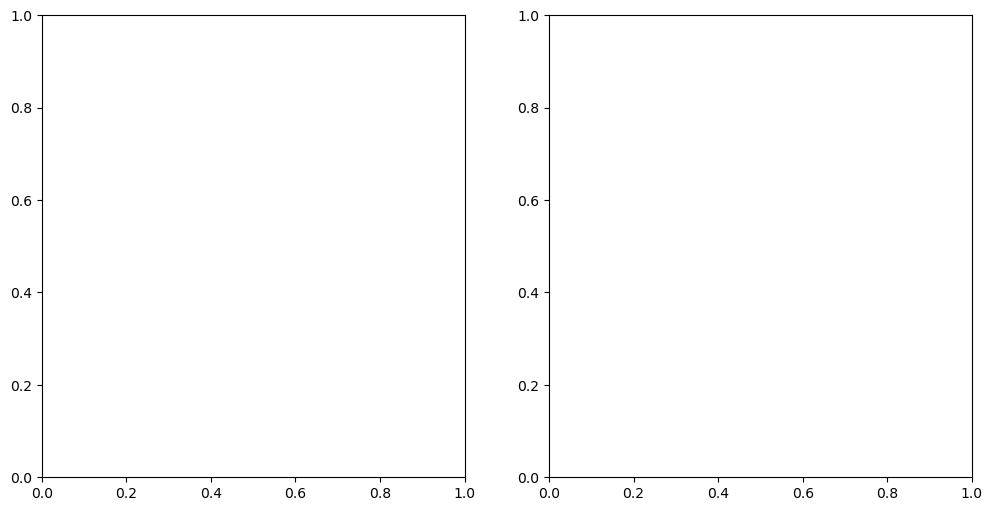

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

# 读取建筑足迹数据（假设为 GeoDataFrame）
# 你可以从 OSM 数据或其他 GIS 数据源中获取
# building_footprints = gpd.read_file('your_building_footprints_data.shp')
# "F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp"
building_footprints = gpd.read_file('F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp')

# 创建一个城市网格（假设为1公里×1公里）
xmin, ymin, xmax, ymax = building_footprints.total_bounds
grid_cells = []
cell_size = 1000  # 1公里
for x0 in np.arange(xmin, xmax, cell_size):
    for y0 in np.arange(ymin, ymax, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=building_footprints.crs)

# 计算每个网格单元中的建筑足迹密度、复杂性等形态学特征（略）

# 通过无监督学习模型进行聚类（略）

# 可视化形态类型分布
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 左侧图：显示城市中不同形态类型的空间分布
grid['class'] = clusters  # 假设clusters是聚类结果
grid.plot(column='class', ax=ax[0], legend=True, cmap='viridis')

# 右侧图：显示每种形态类型的典型建筑足迹
for i, class_id in enumerate(np.unique(clusters)):
    class_patches = grid[grid['class'] == class_id].geometry
    # 绘制每个类别的代表性图像块
    # 这里假设 class_patches 是已知的典型图像块
    for j, patch in enumerate(class_patches[:5]):
        ax[1].plot(patch.exterior.xy[0], patch.exterior.xy[1])

plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


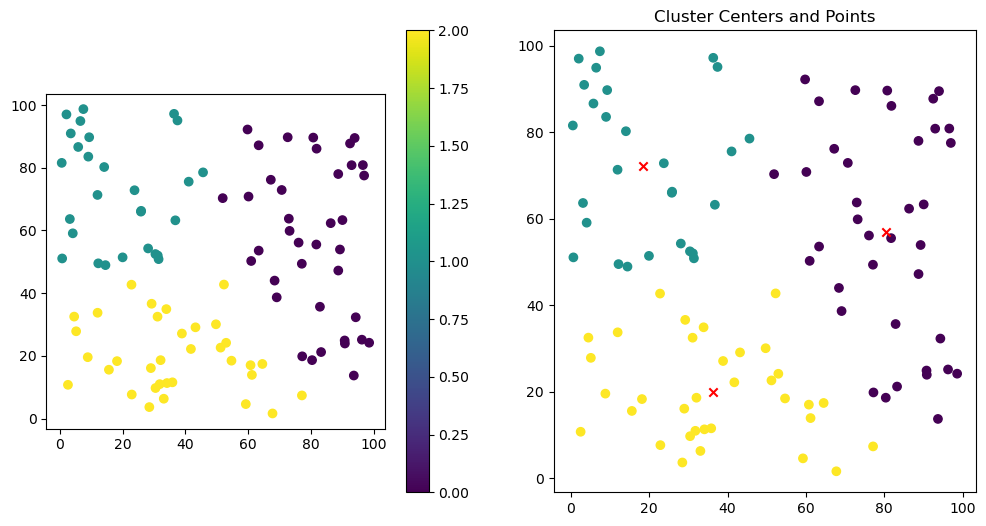

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.cluster import KMeans

# 模拟数据集
# 假设你有一个简单的2D点数据集
np.random.seed(42)
X = np.random.rand(100, 2) * 100  # 生成100个点，范围在0-100之间

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# 将数据转化为GeoDataFrame
grid = pd.DataFrame(X, columns=['x', 'y'])
grid['geometry'] = gpd.points_from_xy(grid['x'], grid['y'])
grid = gpd.GeoDataFrame(grid)

# 添加聚类结果到数据集
grid['class'] = clusters

# 绘图
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 左侧图：显示城市中不同形态类型的空间分布
grid.plot(column='class', ax=ax[0], legend=True, cmap='viridis')

# 右侧图：显示每种形态类型的典型建筑足迹
# 这里只是展示聚类中心点
centers = kmeans.cluster_centers_
ax[1].scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
ax[1].scatter(centers[:, 0], centers[:, 1], c='red', marker='x')  # 显示聚类中心
ax[1].set_title('Cluster Centers and Points')

plt.show()


d:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


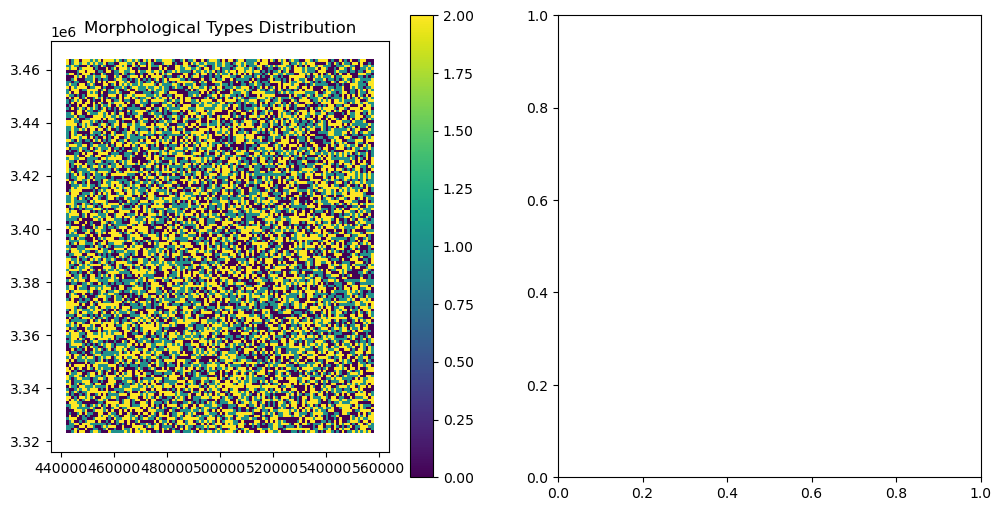

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
from sklearn.cluster import KMeans

# 读取建筑足迹数据
building_footprints = gpd.read_file('F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp')

# 创建一个城市网格（假设为1公里×1公里）
xmin, ymin, xmax, ymax = building_footprints.total_bounds
grid_cells = []
cell_size = 1000  # 1公里
for x0 in np.arange(xmin, xmax, cell_size):
    for y0 in np.arange(ymin, ymax, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=building_footprints.crs)

# 模拟建筑足迹的形态学特征
# 例如：每个网格的建筑密度、复杂性（这里用随机数模拟）
grid['density'] = np.random.rand(len(grid)) * 100  # 模拟建筑密度
grid['complexity'] = np.random.rand(len(grid)) * 100  # 模拟建筑复杂性

# 组合特征进行聚类
X = grid[['density', 'complexity']].values
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
grid['class'] = clusters

# 可视化形态类型分布
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 左侧图：显示城市中不同形态类型的空间分布
grid.plot(column='class', ax=ax[0], legend=True, cmap='viridis')
ax[0].set_title('Morphological Types Distribution')

# 右侧图：显示每种形态类型的典型建筑足迹
for i, class_id in enumerate(np.unique(clusters)):
    class_patches = grid[grid['class'] == class_id].geometry
    # 只显示每个类别的前5个网格


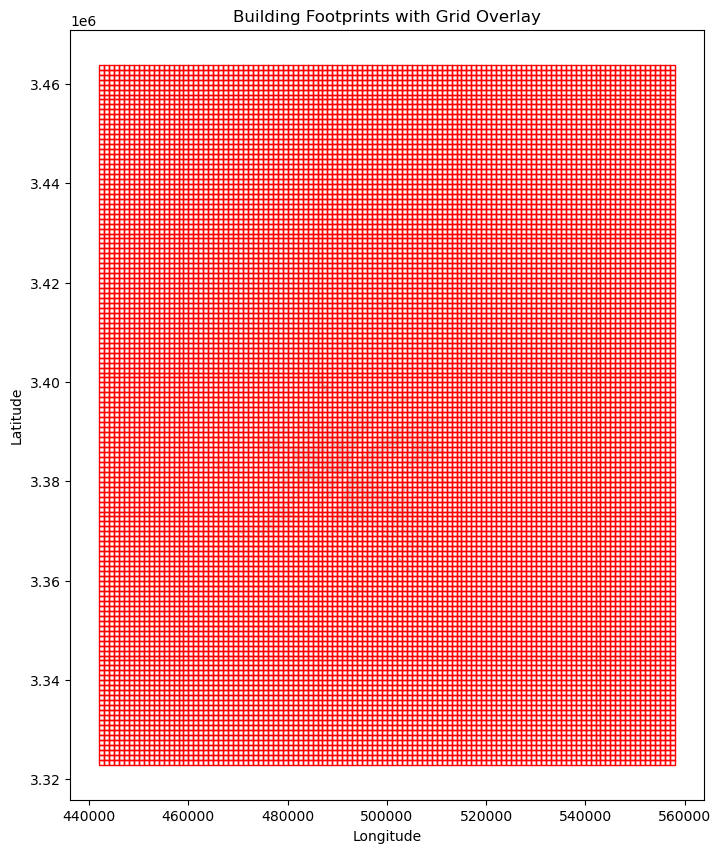

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 创建一个城市网格（假设为1公里×1公里）
xmin, ymin, xmax, ymax = building_footprints.total_bounds
grid_cells = []
cell_size = 1000  # 1公里的格子

# 生成网格
for x0 in np.arange(xmin, xmax, cell_size):
    for y0 in np.arange(ymin, ymax, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

# 将网格转化为GeoDataFrame
grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=building_footprints.crs)

# 可视化
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制建筑足迹
building_footprints.plot(ax=ax, color='lightgrey')

# 绘制网格
grid.boundary.plot(ax=ax, linewidth=1, color='red')

plt.title("Building Footprints with Grid Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取SHP文件
shapefile_path = 'path_to_your_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# 打印前几行数据来检查
print(gdf.head())

# 可视化显示
gdf.plot()
plt.show()


DataSourceError: path_to_your_shapefile.shp: No such file or directory

In [ ]:
# 自定义可视化
gdf.plot(column='attribute_column', cmap='OrRd', legend=True)
plt.title('Title of the Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


NameError: name 'gdf' is not defined

要在可视化过程中只选择区域中心的一部分，可以通过以下步骤来完成。假设你已经读取了建筑足迹的SHP文件并创建了网格，现在我们可以定义一个中心区域，然后只显示这个中心区域的网格和建筑足迹。

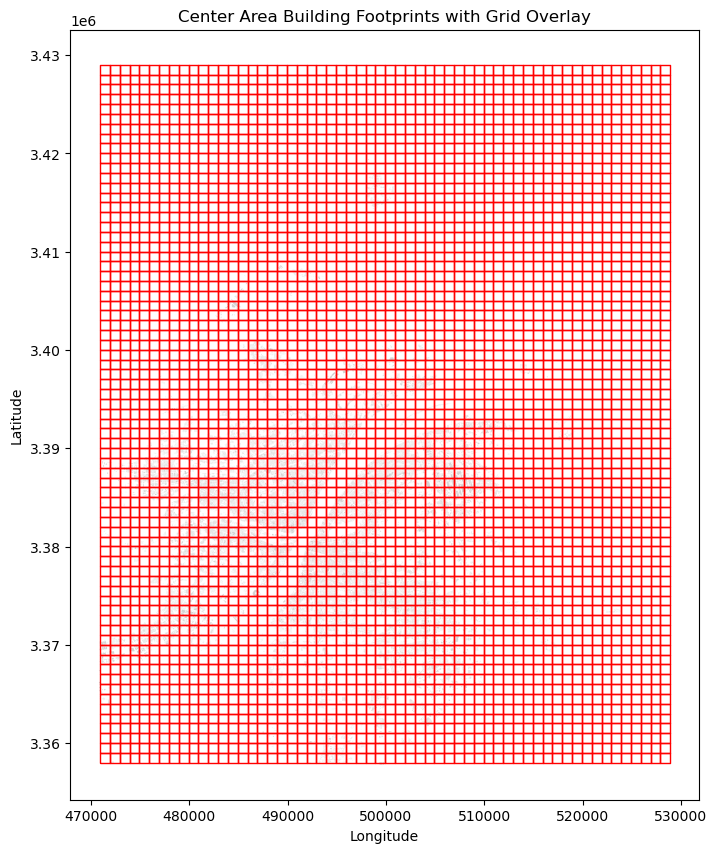

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

# 定义中心区域的边界（例如选取整个范围的中心50%区域）
x_center_min = xmin + (xmax - xmin) * 0.25
x_center_max = xmax - (xmax - xmin) * 0.25
y_center_min = ymin + (ymax - ymin) * 0.25
y_center_max = ymax - (ymax - ymin) * 0.25

# 仅选择建筑足迹数据中的中心区域
center_area = building_footprints.cx[x_center_min:x_center_max, y_center_min:y_center_max]

# 创建一个城市网格（假设为1公里×1公里）
grid_cells = []
cell_size = 1000  # 1公里的格子

# 生成网格，但仅限于中心区域
for x0 in np.arange(x_center_min, x_center_max, cell_size):
    for y0 in np.arange(y_center_min, y_center_max, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

# 将网格转化为GeoDataFrame
grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=building_footprints.crs)

# 可视化中心区域
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制中心区域的建筑足迹
center_area.plot(ax=ax, color='lightgrey')

# 绘制中心区域的网格
grid.boundary.plot(ax=ax, linewidth=1, color='red')

plt.title("Center Area Building Footprints with Grid Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# 区域划分

接下来进行shp文件的网格划分（不使用底图）

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
from sklearn.cluster import KMeans


In [2]:
# 读取建筑足迹数据
# shapefile_path = '/mnt/data/Wuhan_Buildings_DWG-Polygon.shp'
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

In [ ]:
# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

In [ ]:
# 创建网格
cell_size = 1000  # 1公里的格子
grid_cells = []
for x0 in np.arange(xmin, xmax, cell_size):
    for y0 in np.arange(ymin, ymax, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

In [ ]:
# 将网格转化为GeoDataFrame
grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=building_footprints.crs)

In [ ]:
# 模拟建筑密度特征 (可以用实际数据替换)
grid['density'] = np.random.rand(len(grid)) * 100

In [ ]:
# 使用KMeans聚类
X = grid[['density']].values
kmeans = KMeans(n_clusters=4, random_state=42)
grid['class'] = kmeans.fit_predict(X)

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


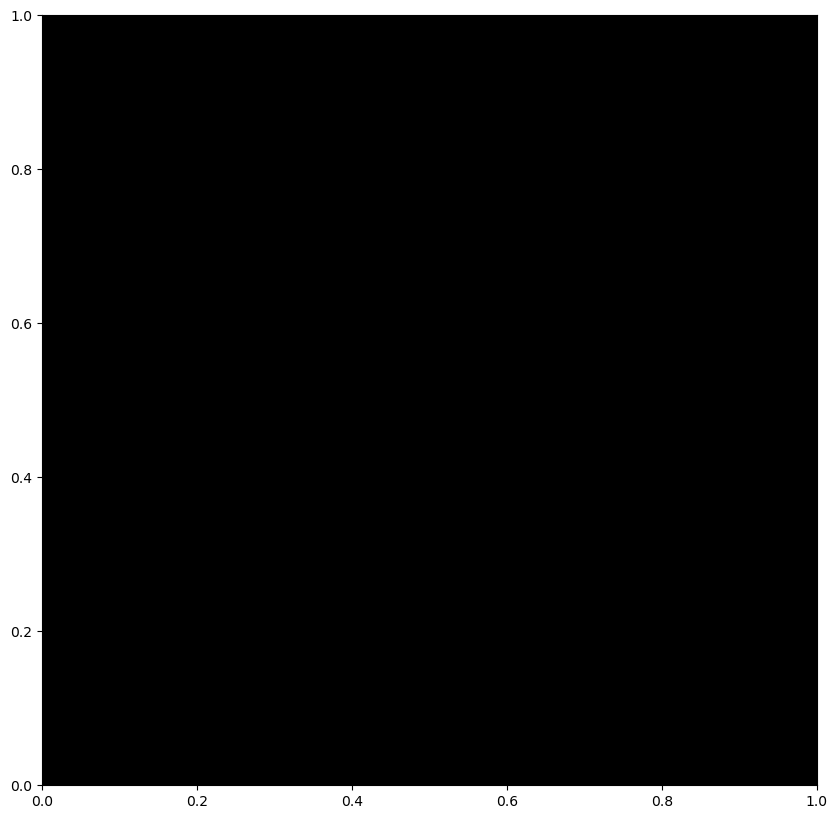

In [ ]:
# 可视化
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')  # 设置背景为黑色

In [ ]:
# 绘制建筑足迹
building_footprints.plot(ax=ax, color='white', linewidth=0.5)

<Axes: >

In [ ]:
# 绘制网格并按照类别着色
grid.plot(column='class', ax=ax, cmap='viridis', edgecolor='grey', alpha=0.7, legend=True)

<Axes: >

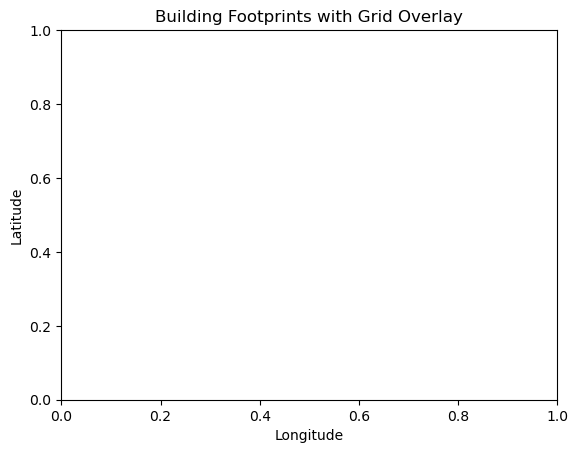

In [ ]:
# 设置图表标题和其他元素
plt.title("Building Footprints with Grid Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 检查和调试

In [ ]:
print(building_footprints.head())

       Entity Layer  LyrFrzn  LyrOn  Color    Linetype  Elevation  LineWt  \
0  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
1  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
2  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
3  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
4  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   

  RefName  DocUpdate                                           geometry  
0    None 2019-12-31  POLYGON Z ((502782.315 3366527.448 3, 502756.1...  
1    None 2019-12-31  POLYGON Z ((503199.818 3370987.493 3, 503178.9...  
2    None 2019-12-31  POLYGON Z ((503489.682 3371179.36 3, 503489.6 ...  
3    None 2019-12-31  POLYGON Z ((503332.43 3371380.398 3, 503332.32...  
4    None 2019-12-31  POLYGON Z ((502277.223 3372761.524 3, 502252.4...  


In [ ]:
print(building_footprints.total_bounds)
print(grid.total_bounds)

[ 442030.2234 3322899.4248  557629.4557 3463391.6535]
[ 442030.2234 3322899.4248  558030.2234 3463899.4248]


In [ ]:
print(building_footprints.crs)
print(grid.crs)

PROJCS["UTM_Modified",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",114.3739003],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["UTM_Modified",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",114.3739003],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:
grid = grid.to_crs(building_footprints.crs)

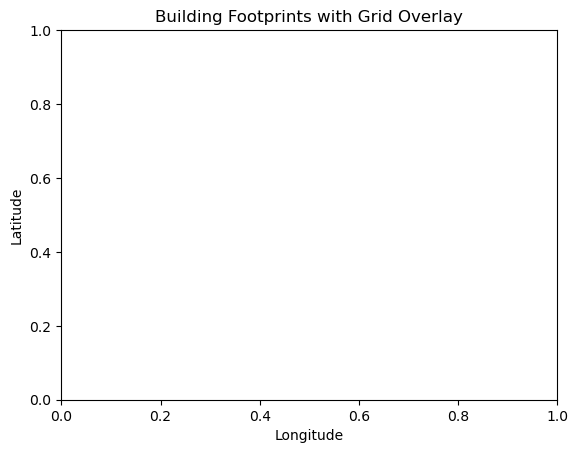

In [ ]:
# 设置图表标题和其他元素
plt.title("Building Footprints with Grid Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

In [ ]:
# 确保SHP文件成功读取
if building_footprints.empty:
    raise ValueError("SHP文件加载失败或文件为空。")

In [ ]:
# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

In [ ]:
# 检查建筑足迹数据是否正确加载
print(building_footprints.head())  # 打印前几行数据检查

       Entity Layer  LyrFrzn  LyrOn  Color    Linetype  Elevation  LineWt  \
0  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
1  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
2  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
3  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
4  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   

  RefName  DocUpdate                                           geometry  
0    None 2019-12-31  POLYGON Z ((502782.315 3366527.448 3, 502756.1...  
1    None 2019-12-31  POLYGON Z ((503199.818 3370987.493 3, 503178.9...  
2    None 2019-12-31  POLYGON Z ((503489.682 3371179.36 3, 503489.6 ...  
3    None 2019-12-31  POLYGON Z ((503332.43 3371380.398 3, 503332.32...  
4    None 2019-12-31  POLYGON Z ((502277.223 3372761.524 3, 502252.4...  


In [3]:
# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

In [4]:
# 创建网格
cell_size = 1000  # 1公里的格子
grid_cells = []
for x0 in np.arange(xmin, xmax, cell_size):
    for y0 in np.arange(ymin, ymax, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

In [5]:
# 将网格转化为GeoDataFrame
grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=building_footprints.crs)

In [6]:
# 模拟建筑密度特征 (可以用实际数据替换)
grid['density'] = np.random.rand(len(grid)) * 100

In [8]:
# 检查模拟建筑密度特征是否正确模拟
print(grid['density'])  # 打印前几行数据检查

0        45.295701
1        92.481784
2        65.499861
3        43.581330
4        35.638185
           ...    
16351    73.266686
16352    75.619560
16353    38.233777
16354    37.468410
16355    96.165699
Name: density, Length: 16356, dtype: float64


In [9]:
# 使用KMeans聚类
X = grid[['density']].values
kmeans = KMeans(n_clusters=4, random_state=42)
grid['class'] = kmeans.fit_predict(X)

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


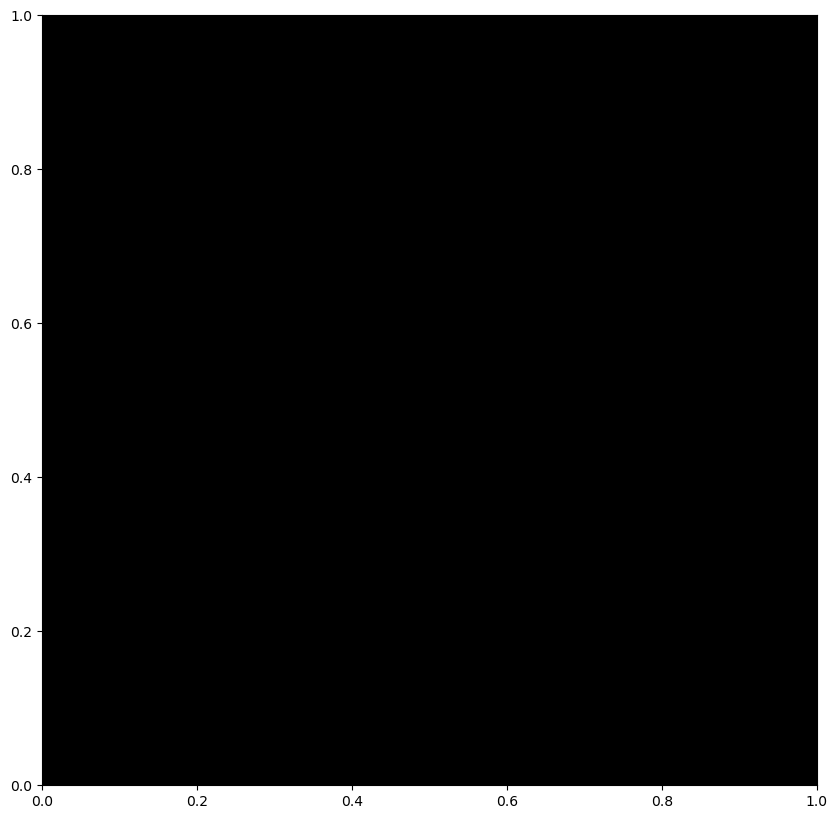

In [10]:
# 可视化
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')  # 设置背景为黑色


In [11]:
# 绘制建筑足迹 (忽略Z坐标，只使用XY)
building_footprints.plot(ax=ax, color='white', linewidth=0.5)

<Axes: >

In [12]:
# 绘制网格并按照类别着色
grid.plot(column='class', ax=ax, cmap='viridis', edgecolor='grey', alpha=0.7, legend=True)

<Axes: >

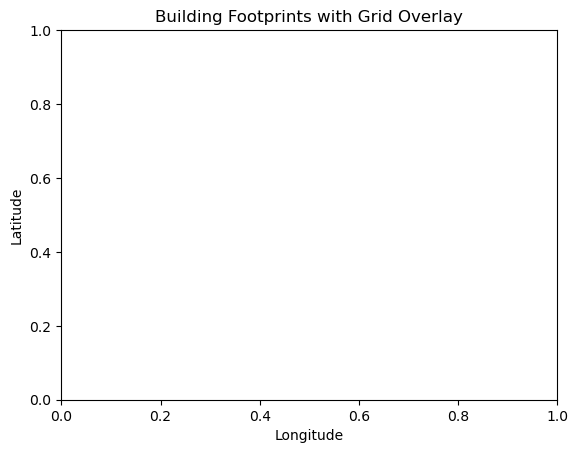

In [13]:
# 设置图表标题和其他元素
plt.title("Building Footprints with Grid Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 再次检查

In [14]:
# 1. GeoDataFrame 数据为空:
# 如果GeoDataFrame (building_footprints或grid) 是空的，图表自然无法显示内容。你可以检查每个GeoDataFrame是否为空，例如：
# 如果其中任何一个是True，说明数据集为空，这可能是数据路径问题或数据格式问题。

print(building_footprints.empty)
print(grid.empty)

False
False


In [15]:
print(building_footprints.crs)
print(grid.crs)


PROJCS["UTM_Modified",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",114.3739003],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["UTM_Modified",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",114.3739003],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [16]:
print(building_footprints.crs)
print(grid.crs)


PROJCS["UTM_Modified",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",114.3739003],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["UTM_Modified",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",114.3739003],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [17]:
grid = grid.to_crs(building_footprints.crs)


In [ ]:
print(building_footprints.total_bounds)
print(grid.total_bounds)


[ 442030.2234 3322899.4248  557629.4557 3463391.6535]
[ 442030.2234 3322899.4248  558030.2234 3463899.4248]


In [18]:
print(grid['class'].unique())


[3 0 2 1]


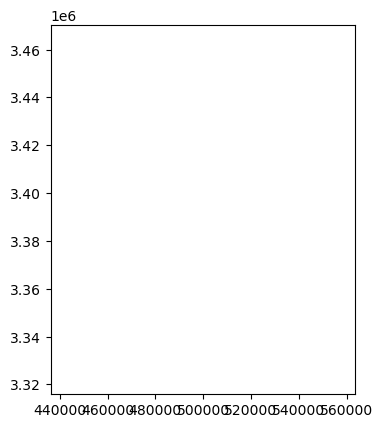

In [19]:
building_footprints.plot(color='white')
plt.show()


In [20]:
# 创建示例网格数据 (之前步骤中已生成)
cell_size = 1000  # 1公里的格子
xmin, ymin, xmax, ymax = 0, 0, 5000, 5000  # 假设的边界
grid_cells = []
for x0 in np.arange(xmin, xmax, cell_size):
    for y0 in np.arange(ymin, ymax, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

In [21]:
# 将网格转化为GeoDataFrame
grid = gpd.GeoDataFrame(geometry=grid_cells, crs="EPSG:4326")

In [22]:
# 模拟建筑密度特征 (可以用实际数据替换)
grid['density'] = np.random.rand(len(grid)) * 100

In [23]:
# 打印密度特征前几行
print(grid['density'].head())

0    30.223652
1     8.407006
2    59.875924
3    71.756061
4    84.788373
Name: density, dtype: float64


<Axes: >

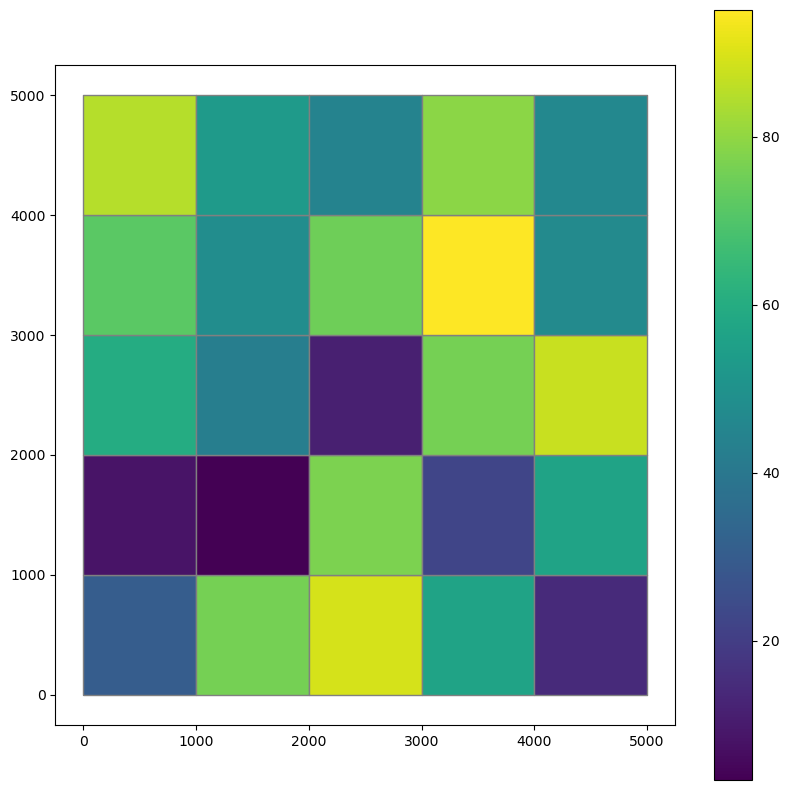

In [24]:
# 可视化密度特征
fig, ax = plt.subplots(figsize=(10, 10))
grid.plot(column='density', ax=ax, cmap='viridis', edgecolor='grey', legend=True)

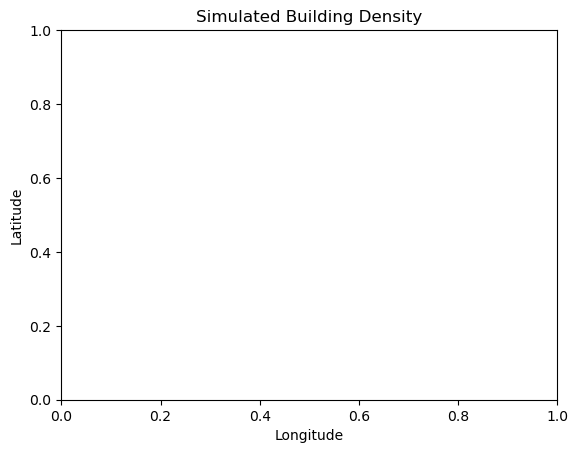

In [25]:
plt.title("Simulated Building Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 重写

In [26]:
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

In [28]:
# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds
print(f"Bounds of the shapefile: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")

Bounds of the shapefile: xmin=442030.22339999955, ymin=3322899.424799999, xmax=557629.4556999998, ymax=3463391.6535


In [29]:
# 使用建筑足迹的边界来创建网格
cell_size = 1000  # 1公里的格子
grid_cells = []
for x0 in np.arange(xmin, xmax, cell_size):
    for y0 in np.arange(ymin, ymax, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

In [30]:
# 将网格转化为GeoDataFrame
grid = gpd.GeoDataFrame(geometry=grid_cells, crs=building_footprints.crs)


In [31]:
# 模拟建筑密度特征 (可以用实际数据替换)
grid['density'] = np.random.rand(len(grid)) * 100

In [32]:
# 打印密度特征前几行
print(grid['density'].head())
print(grid['density'].describe())  # 检查密度分布

0     8.930829
1     5.243298
2    29.920263
3    41.739445
4    32.479568
Name: density, dtype: float64
count    16356.000000
mean        49.611474
std         28.845949
min          0.008009
25%         24.557454
50%         49.487431
75%         74.580363
max         99.998101
Name: density, dtype: float64


<Axes: >

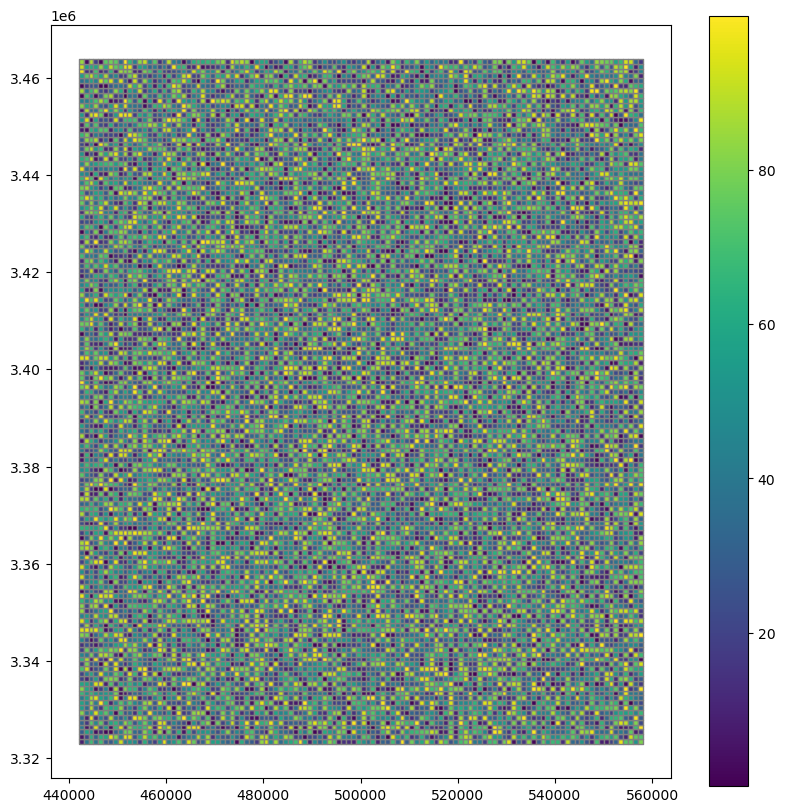

In [33]:
# 可视化密度特征
fig, ax = plt.subplots(figsize=(10, 10))
grid.plot(column='density', ax=ax, cmap='viridis', edgecolor='grey', legend=True)

In [34]:
# 将显示的范围设置为建筑足迹的边界
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

(3322899.424799999, 3463391.6535)

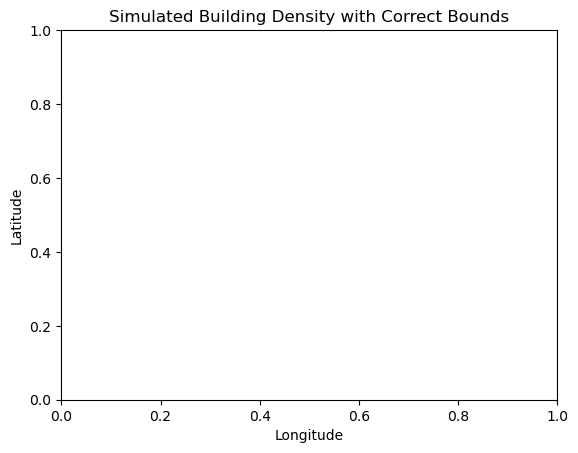

In [35]:
plt.title("Simulated Building Density with Correct Bounds")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

根据shapefile中的高度数据，对本shp文件进行可视化

       Entity Layer  LyrFrzn  LyrOn  Color    Linetype  Elevation  LineWt  \
0  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
1  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
2  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
3  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
4  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   

  RefName  DocUpdate                                           geometry  
0    None 2019-12-31  POLYGON Z ((502782.315 3366527.448 3, 502756.1...  
1    None 2019-12-31  POLYGON Z ((503199.818 3370987.493 3, 503178.9...  
2    None 2019-12-31  POLYGON Z ((503489.682 3371179.36 3, 503489.6 ...  
3    None 2019-12-31  POLYGON Z ((503332.43 3371380.398 3, 503332.32...  
4    None 2019-12-31  POLYGON Z ((502277.223 3372761.524 3, 502252.4...  


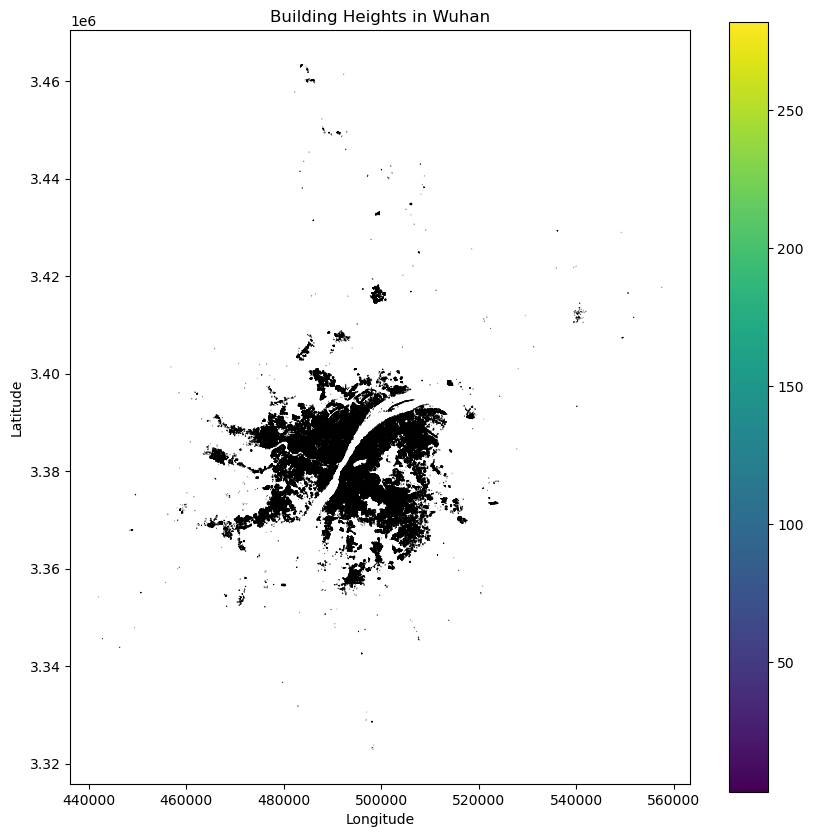

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 检查数据
print(building_footprints.head())  # 确认数据结构和高度列名

# 可视化高度数据（假设高度数据在'Elevation'列）
fig, ax = plt.subplots(figsize=(10, 10))
building_footprints.plot(column='Elevation', ax=ax, cmap='viridis', legend=True, linewidth=0.8, edgecolor='black')

# 设置图表标题和标签
plt.title("Building Heights in Wuhan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [38]:
# 检查数据
print(building_footprints.head())  # 确认数据结构和高度列名

       Entity Layer  LyrFrzn  LyrOn  Color    Linetype  Elevation  LineWt  \
0  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
1  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
2  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
3  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
4  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   

  RefName  DocUpdate                                           geometry  
0    None 2019-12-31  POLYGON Z ((502782.315 3366527.448 3, 502756.1...  
1    None 2019-12-31  POLYGON Z ((503199.818 3370987.493 3, 503178.9...  
2    None 2019-12-31  POLYGON Z ((503489.682 3371179.36 3, 503489.6 ...  
3    None 2019-12-31  POLYGON Z ((503332.43 3371380.398 3, 503332.32...  
4    None 2019-12-31  POLYGON Z ((502277.223 3372761.524 3, 502252.4...  


In [57]:
from matplotlib.colors import LinearSegmentedColormap  # 导入 LinearSegmentedColormap

# 定义自定义颜色映射（从蓝色到红色）
colors = [(0, 0, 1), (1, 0, 0)]  # 蓝 -> 红
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

<Axes: >

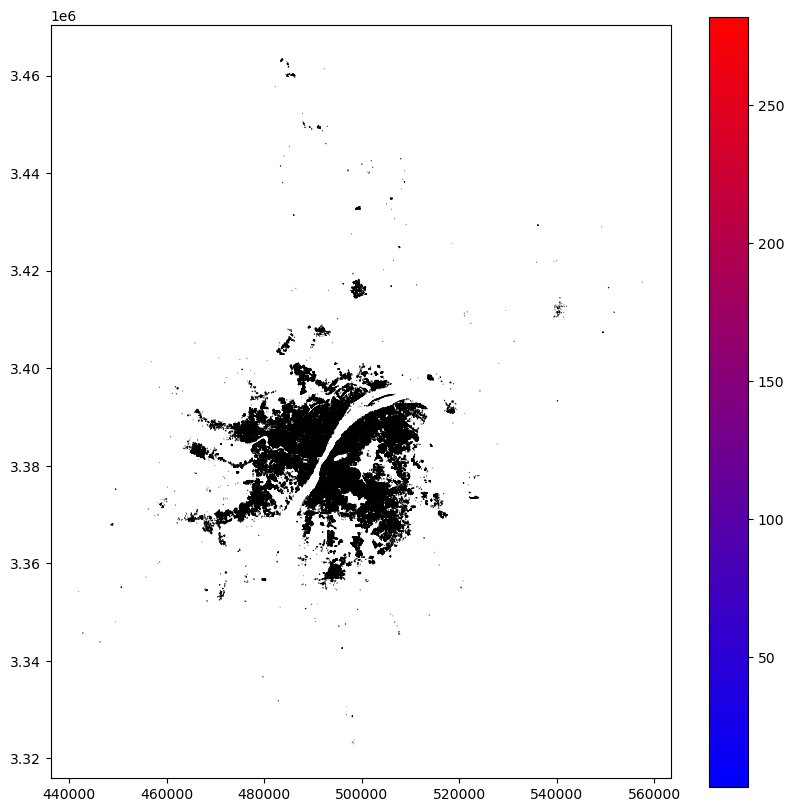

In [42]:
# 可视化高度数据
fig, ax = plt.subplots(figsize=(10, 10))
building_footprints.plot(column='Elevation', ax=ax, cmap=cmap, legend=True, linewidth=0.8, edgecolor='black')

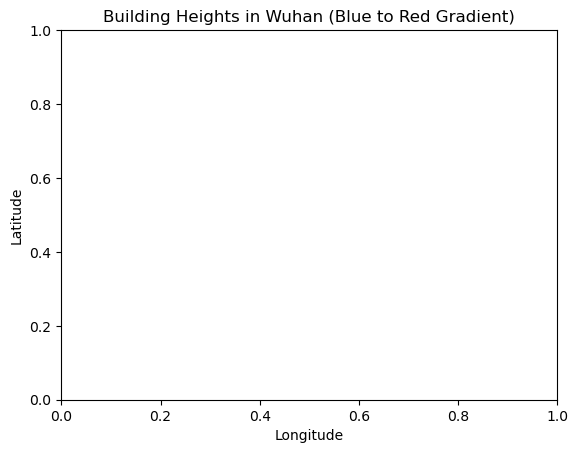

In [53]:
# 设置图表标题和标签
plt.title("Building Heights in Wuhan (Blue to Red Gradient)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

       Entity Layer  LyrFrzn  LyrOn  Color    Linetype  Elevation  LineWt  \
0  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
1  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
2  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
3  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   
4  LWPolyline   武汉市        0      1    245  Continuous        3.0      25   

  RefName  DocUpdate                                           geometry  
0    None 2019-12-31  POLYGON Z ((502782.315 3366527.448 3, 502756.1...  
1    None 2019-12-31  POLYGON Z ((503199.818 3370987.493 3, 503178.9...  
2    None 2019-12-31  POLYGON Z ((503489.682 3371179.36 3, 503489.6 ...  
3    None 2019-12-31  POLYGON Z ((503332.43 3371380.398 3, 503332.32...  
4    None 2019-12-31  POLYGON Z ((502277.223 3372761.524 3, 502252.4...  


<Axes: >

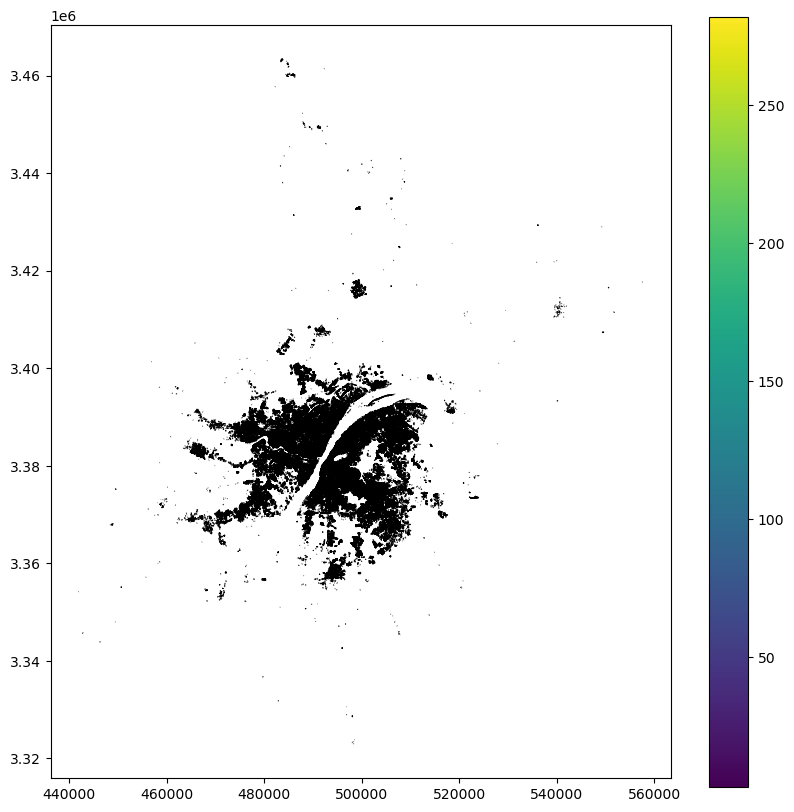

In [58]:
# 重新读取数据

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 检查数据
print(building_footprints.head())  # 确认数据结构和高度列名

# 可视化高度数据（假设高度数据在'Elevation'列）
fig, ax = plt.subplots(figsize=(10, 10))
building_footprints.plot(column='Elevation', ax=ax, cmap='viridis', legend=True, linewidth=0.8, edgecolor='black')

In [59]:
# 定义居中的部分（取中间）
x_center_min = xmin + (xmax - xmin) * 0.025
x_center_max = xmax - (xmax - xmin) * 0.025
y_center_min = ymin + (ymax - ymin) * 0.025
y_center_max = ymax - (ymax - ymin) * 0.025

In [60]:
# 筛选居中部分的建筑足迹数据
center_area = building_footprints.cx[x_center_min:x_center_max, y_center_min:y_center_max]

<Axes: >

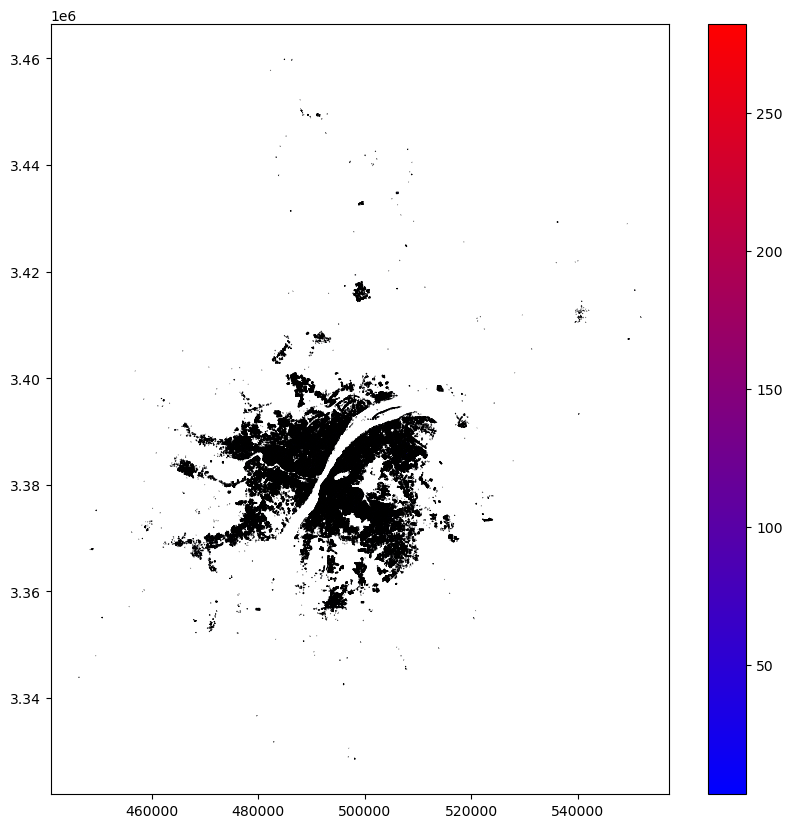

In [61]:
# 可视化居中部分的高度数据
fig, ax = plt.subplots(figsize=(10, 10))
center_area.plot(column='Elevation', ax=ax, cmap=cmap, legend=True, linewidth=0.8, edgecolor='black')


# 只显示居中的5km*5km

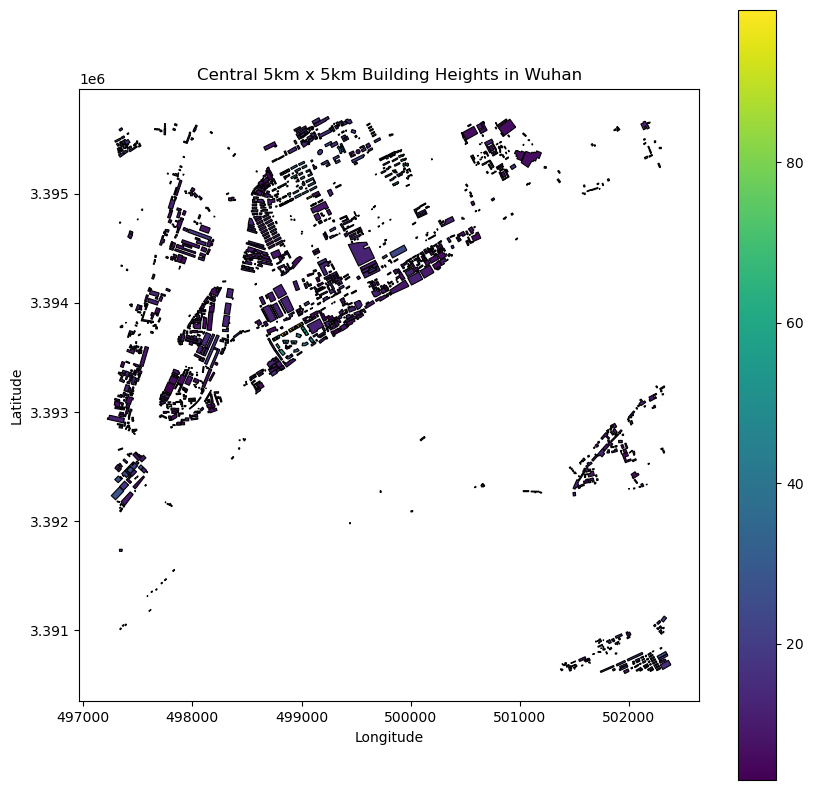

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 重新读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

# 计算中心点
x_center = (xmin + xmax) / 2
y_center = (ymin + ymax) / 2

# 定义居中的5km×5km区域
half_size = 2500  # 一半的距离，5km/2 = 2500m
x_min_center = x_center - half_size
x_max_center = x_center + half_size
y_min_center = y_center - half_size
y_max_center = y_center + half_size

# 筛选出居中5km×5km区域的建筑足迹
center_area = building_footprints.cx[x_min_center:x_max_center, y_min_center:y_max_center]

# 可视化居中5km×5km区域的高度数据
fig, ax = plt.subplots(figsize=(10, 10))
center_area.plot(column='Elevation', ax=ax, cmap='viridis', legend=True, linewidth=0.8, edgecolor='black')

# 设置图表标题和标签
plt.title("Central 5km x 5km Building Heights in Wuhan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


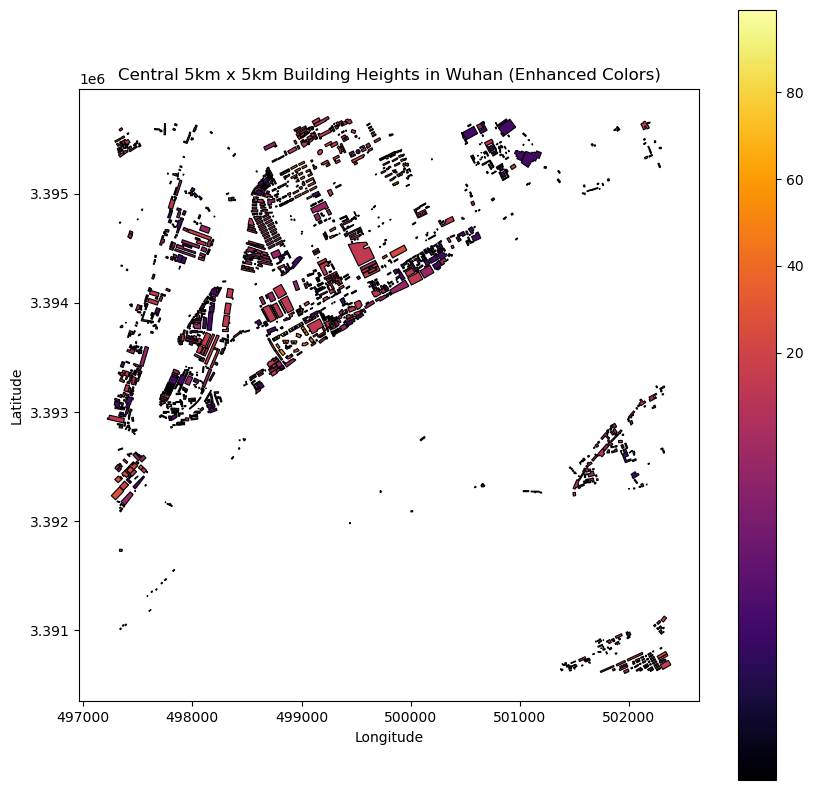

In [65]:
# 颜色区分

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

# 计算中心点
x_center = (xmin + xmax) / 2
y_center = (ymin + ymax) / 2

# 定义居中的5km×5km区域
half_size = 2500  # 一半的距离，5km/2 = 2500m
x_min_center = x_center - half_size
x_max_center = x_center + half_size
y_min_center = y_center - half_size
y_max_center = y_center + half_size

# 筛选出居中5km×5km区域的建筑足迹
center_area = building_footprints.cx[x_min_center:x_max_center, y_min_center:y_max_center]

# 设定颜色映射的范围，使颜色区分更显眼
norm = TwoSlopeNorm(vmin=center_area['Elevation'].min(), vcenter=center_area['Elevation'].mean(), vmax=center_area['Elevation'].max())

# 使用更高对比度的颜色映射（如 'plasma', 'inferno'）
fig, ax = plt.subplots(figsize=(10, 10))
center_area.plot(column='Elevation', ax=ax, cmap='inferno', legend=True, linewidth=0.8, edgecolor='black', norm=norm)

# 设置图表标题和标签
plt.title("Central 5km x 5km Building Heights in Wuhan (Enhanced Colors)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


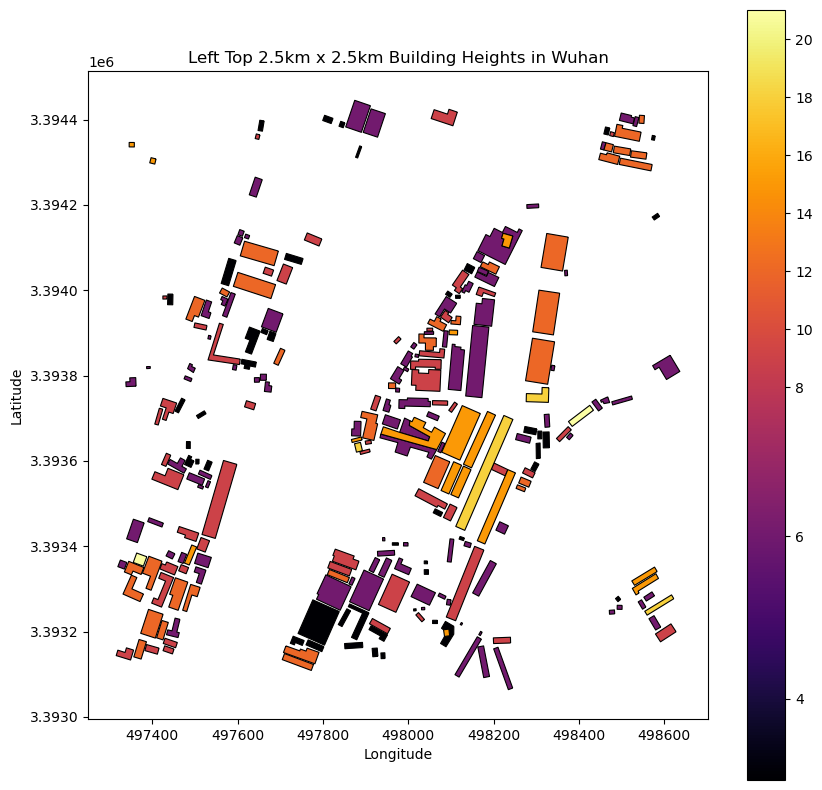

In [66]:
# 左上角显示

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

# 计算中心点
x_center = (xmin + xmax) / 2
y_center = (ymin + ymax) / 2

# 定义居中的5km×5km区域
half_size = 2500  # 一半的距离，5km/2 = 2500m
x_min_center = x_center - half_size
x_max_center = x_center + half_size
y_min_center = y_center - half_size
y_max_center = y_center + half_size

# 筛选出居中5km×5km区域的建筑足迹
center_area = building_footprints.cx[x_min_center:x_max_center, y_min_center:y_max_center]

# 将中心区域划分成田字格四等分
quarter_size = half_size / 2  # 每块的大小为2.5km

# 左上块的边界
x_min_left_top = x_min_center
x_max_left_top = x_min_center + quarter_size
y_min_left_top = y_center
y_max_left_top = y_center + quarter_size

# 筛选出左上块的建筑足迹
left_top_area = center_area.cx[x_min_left_top:x_max_left_top, y_min_left_top:y_max_left_top]

# 设定颜色映射的范围，使颜色区分更显眼
norm = TwoSlopeNorm(vmin=left_top_area['Elevation'].min(), vcenter=left_top_area['Elevation'].mean(), vmax=left_top_area['Elevation'].max())

# 使用更高对比度的颜色映射（如 'plasma', 'inferno'）
fig, ax = plt.subplots(figsize=(10, 10))
left_top_area.plot(column='Elevation', ax=ax, cmap='inferno', legend=True, linewidth=0.8, edgecolor='black', norm=norm)

# 设置图表标题和标签
plt.title("Left Top 2.5km x 2.5km Building Heights in Wuhan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


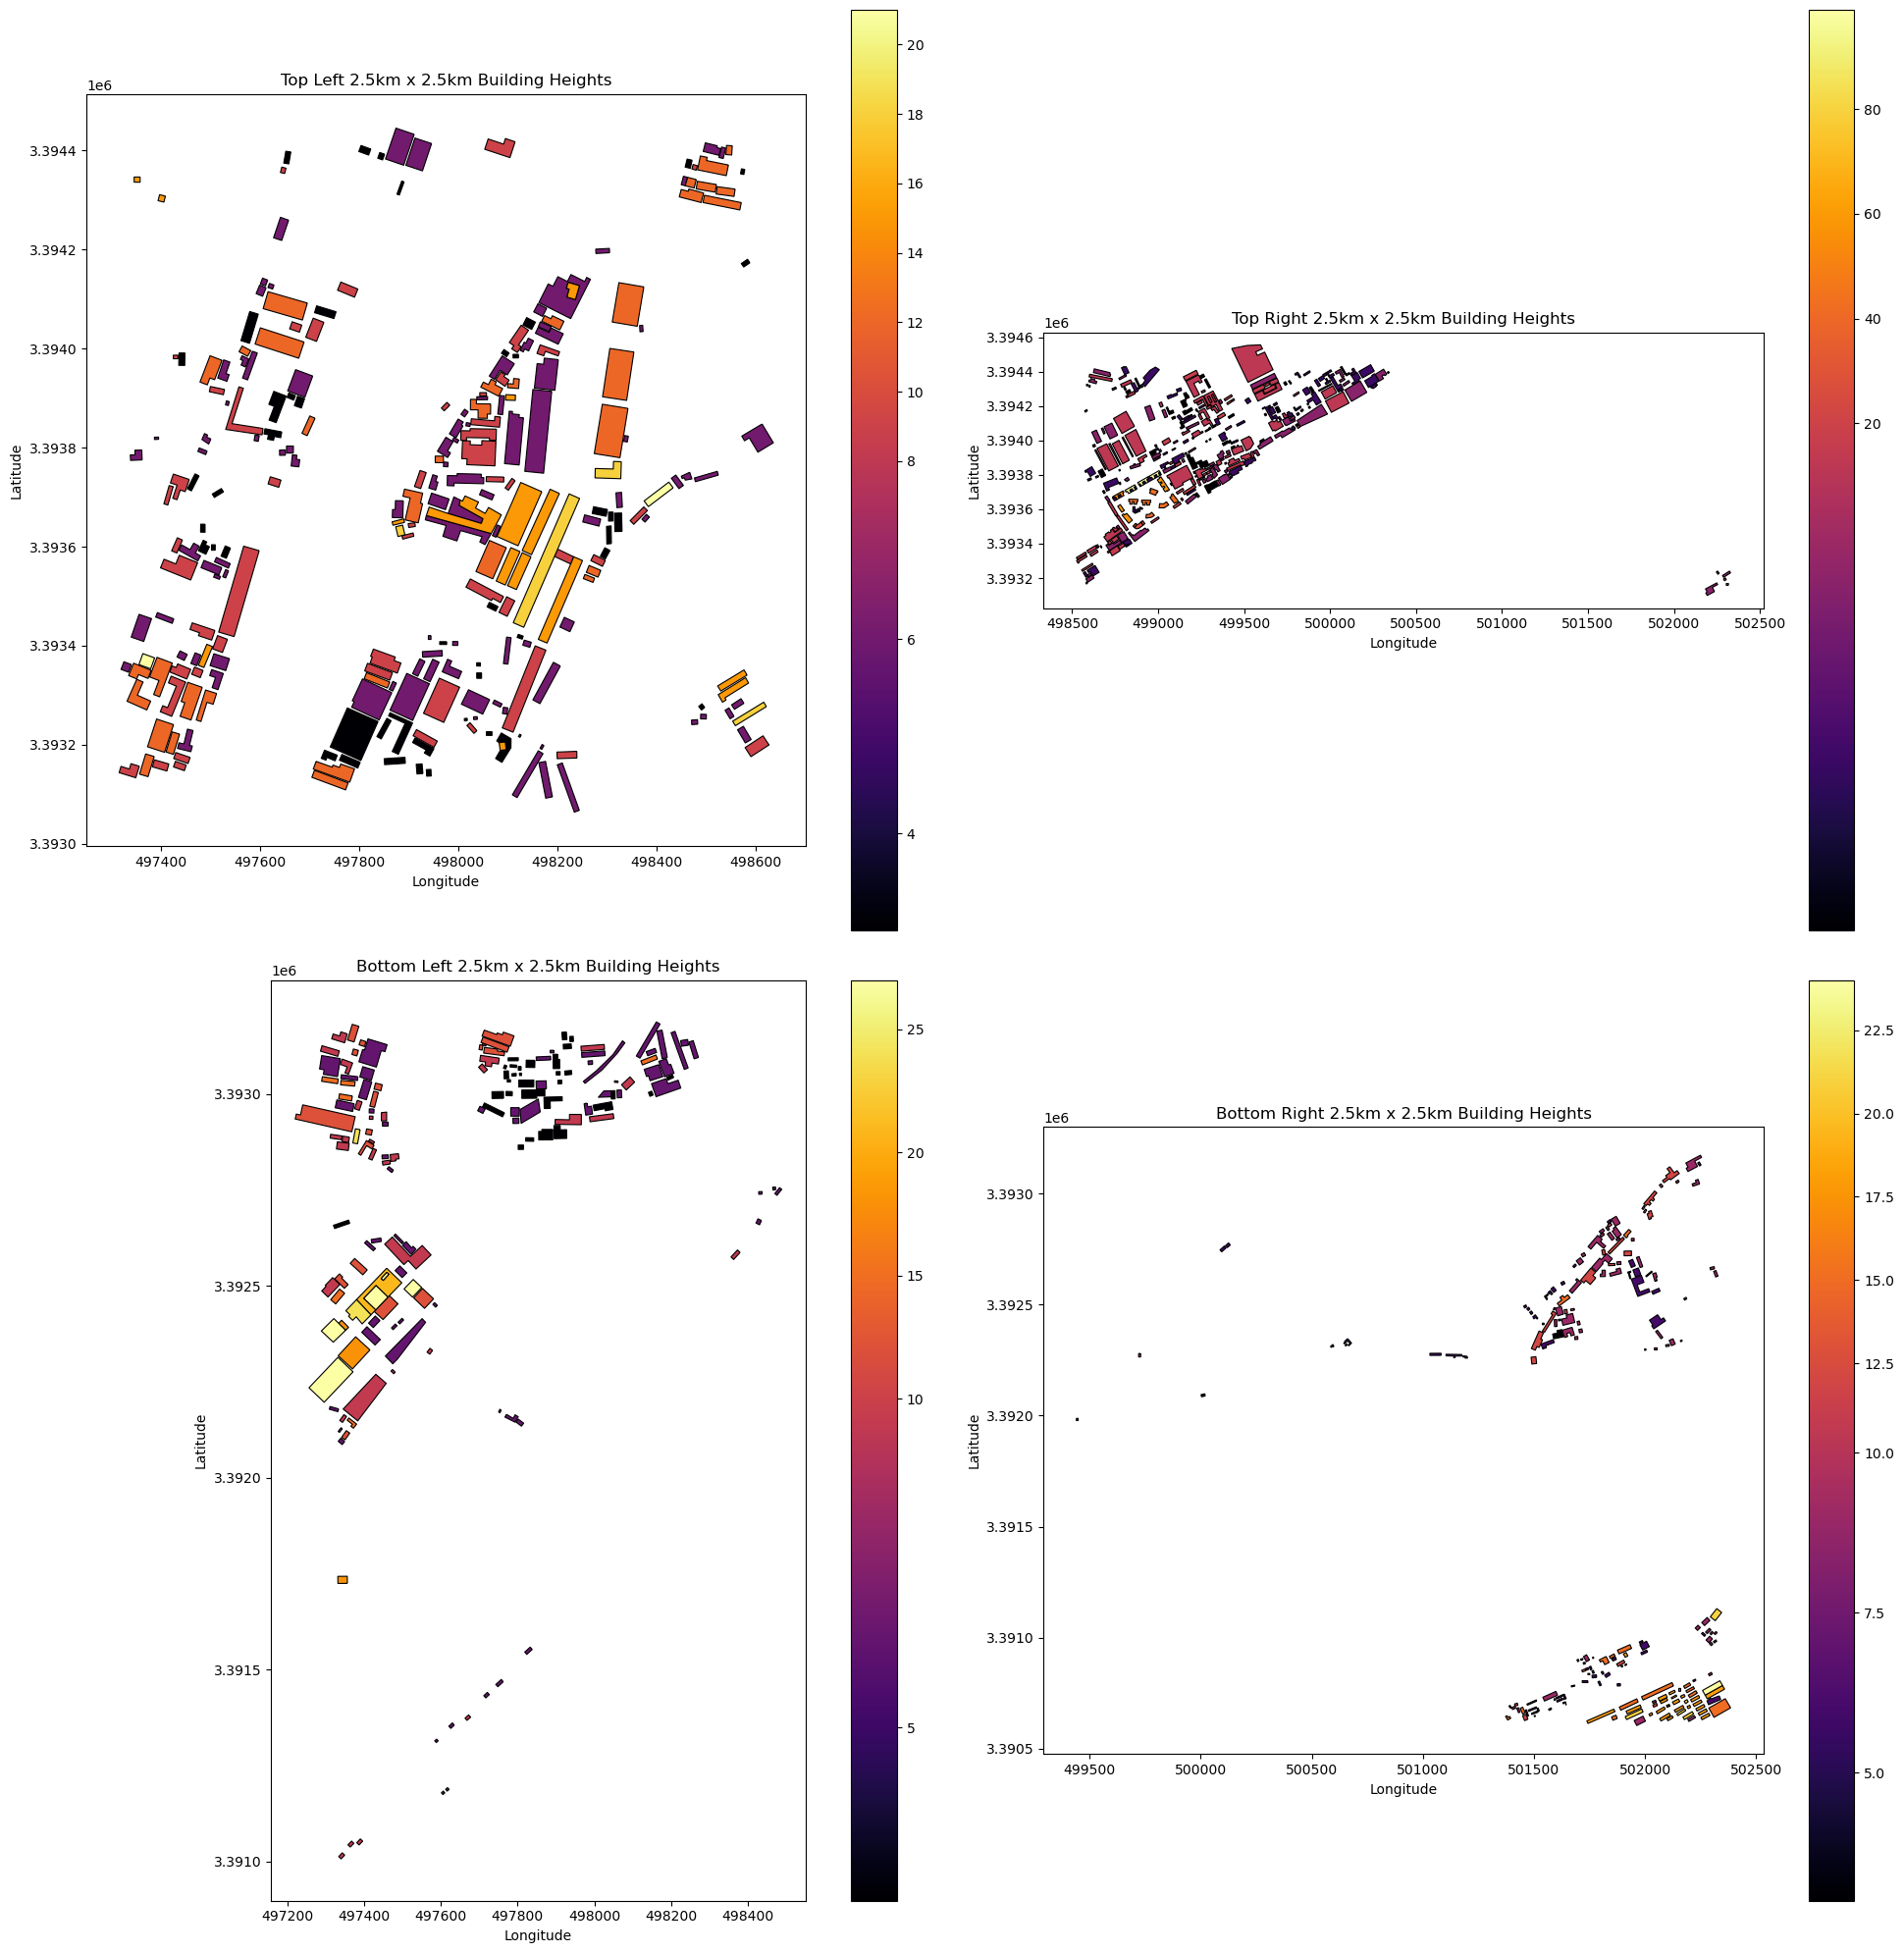

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

# 计算中心点
x_center = (xmin + xmax) / 2
y_center = (ymin + ymax) / 2

# 定义居中的5km×5km区域
half_size = 2500  # 一半的距离，5km/2 = 2500m
x_min_center = x_center - half_size
x_max_center = x_center + half_size
y_min_center = y_center - half_size
y_max_center = y_center + half_size

# 筛选出居中5km×5km区域的建筑足迹
center_area = building_footprints.cx[x_min_center:x_max_center, y_min_center:y_max_center]

# 将中心区域划分成田字格四等分
quarter_size = half_size / 2  # 每块的大小为2.5km

# 定义四个子区域的边界
regions = {
    "Top Left": (x_min_center, x_min_center + quarter_size, y_center, y_center + quarter_size),
    "Top Right": (x_min_center + quarter_size, x_max_center, y_center, y_center + quarter_size),
    "Bottom Left": (x_min_center, x_min_center + quarter_size, y_min_center, y_center),
    "Bottom Right": (x_min_center + quarter_size, x_max_center, y_min_center, y_center)
}

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()  # 将二维数组展平，方便迭代

for i, (region_name, (x_min_r, x_max_r, y_min_r, y_max_r)) in enumerate(regions.items()):
    # 筛选出当前区域的建筑足迹
    region_area = center_area.cx[x_min_r:x_max_r, y_min_r:y_max_r]

    # 设定颜色映射的范围，使颜色区分更显眼
    norm = TwoSlopeNorm(vmin=region_area['Elevation'].min(), vcenter=region_area['Elevation'].mean(), vmax=region_area['Elevation'].max())

    # 使用更高对比度的颜色映射（如 'plasma', 'inferno'）
    region_ax = axs[i]
    region_area.plot(column='Elevation', ax=region_ax, cmap='inferno', legend=True, linewidth=0.8, edgecolor='black', norm=norm)
    region_ax.set_title(f"{region_name} 2.5km x 2.5km Building Heights")
    region_ax.set_xlabel("Longitude")
    region_ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


# 5*5 size of 1km^2

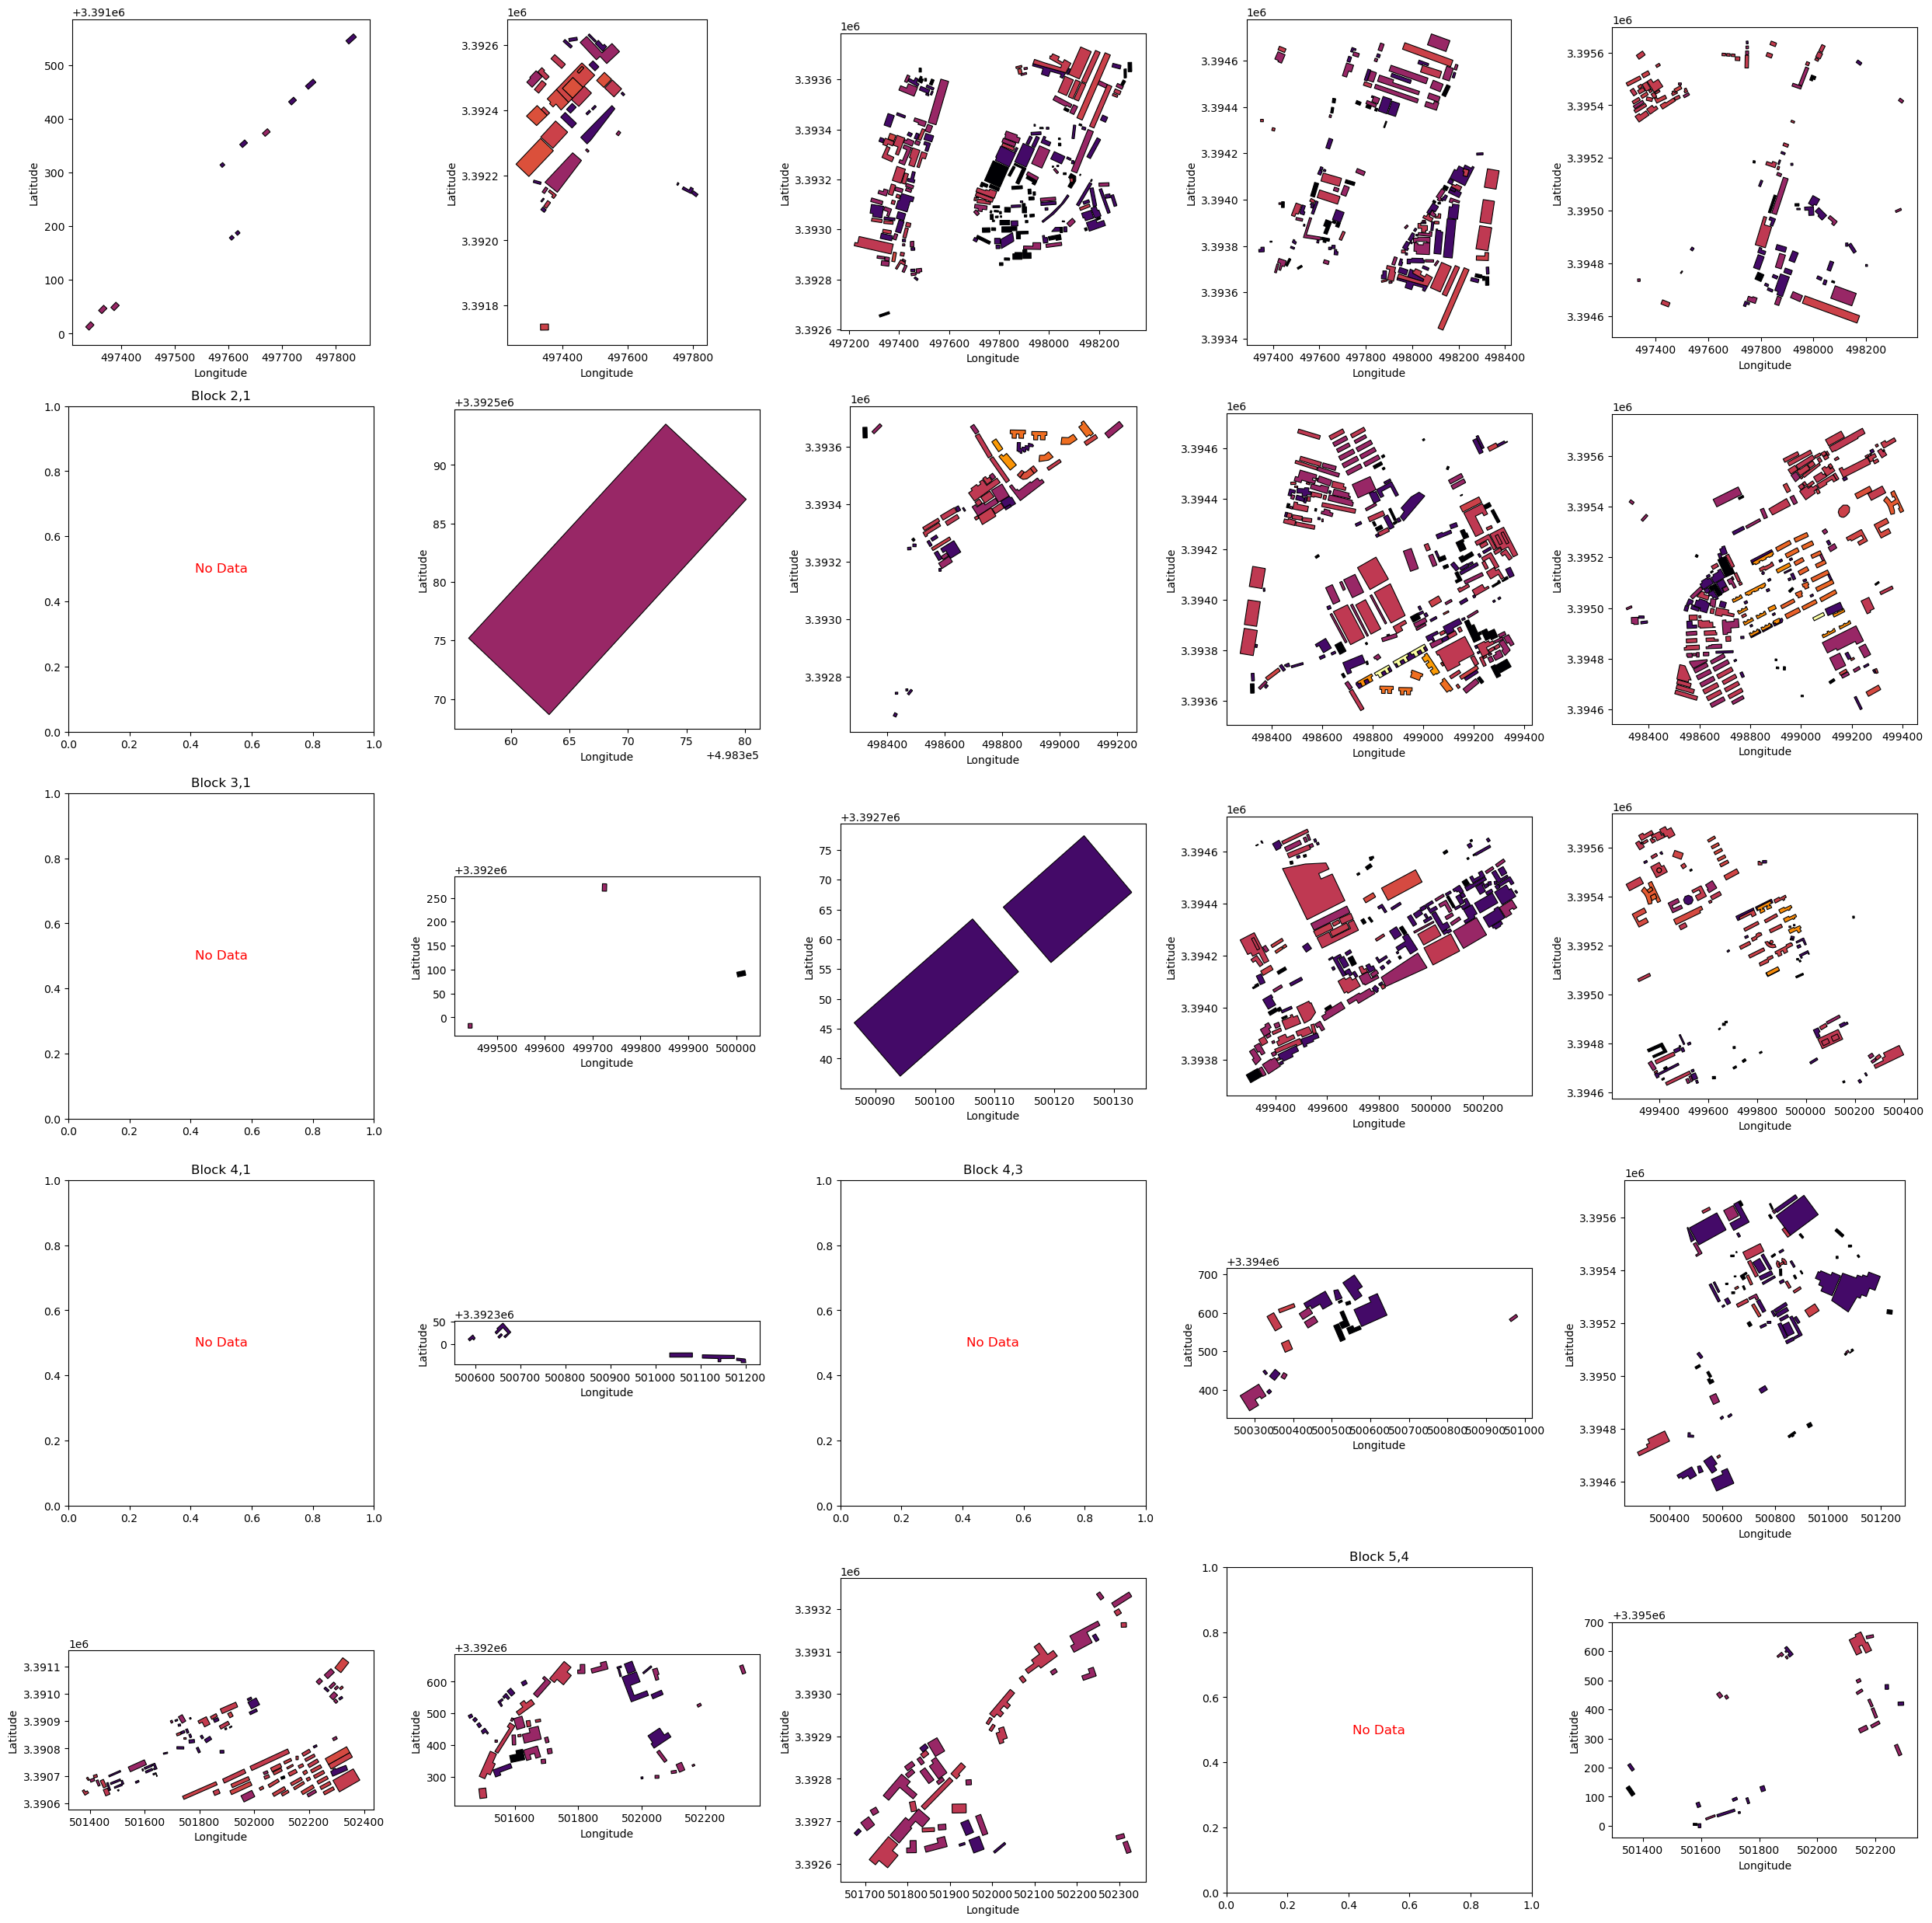

In [71]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

# 计算中心点
x_center = (xmin + xmax) / 2
y_center = (ymin + ymax) / 2

# 定义居中的5km×5km区域
half_size = 2500  # 一半的距离，5km/2 = 2500m
x_min_center = x_center - half_size
x_max_center = x_center + half_size
y_min_center = y_center - half_size
y_max_center = y_center + half_size

# 筛选出居中5km×5km区域的建筑足迹
center_area = building_footprints.cx[x_min_center:x_max_center, y_min_center:y_max_center]

# 将中心区域划分成1km×1km的小块
block_size = 1000  # 每块的大小为1km

# 定义25个小块的边界
regions = []
for i in range(5):
    for j in range(5):
        x_min_r = x_min_center + i * block_size
        x_max_r = x_min_center + (i + 1) * block_size
        y_min_r = y_min_center + j * block_size
        y_max_r = y_min_center + (j + 1) * block_size
        regions.append((f"Block {i+1},{j+1}", (x_min_r, x_max_r, y_min_r, y_max_r)))

# 创建子图
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.flatten()  # 将二维数组展平，方便迭代

# 计算整个区域的 Elevation 范围用于标准化
elevation_values = center_area['Elevation'].dropna()
vmin = elevation_values.min()
vmax = elevation_values.max()
vcenter = elevation_values.mean()

for i, (region_name, (x_min_r, x_max_r, y_min_r, y_max_r)) in enumerate(regions):
    # 筛选出当前区域的建筑足迹
    region_area = center_area.cx[x_min_r:x_max_r, y_min_r:y_max_r]

    if not region_area.empty:
        # 设定颜色映射的范围
        norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

        # 使用更高对比度的颜色映射（如 'plasma', 'inferno'）
        region_ax = axs[i]
        region_area.plot(column='Elevation', ax=region_ax, cmap='inferno', legend=False, linewidth=0.8, edgecolor='black', norm=norm)
    else:
        axs[i].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12, color='red')
        axs[i].set_title(f"{region_name}")

    region_ax.set_xlabel("Longitude")
    region_ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


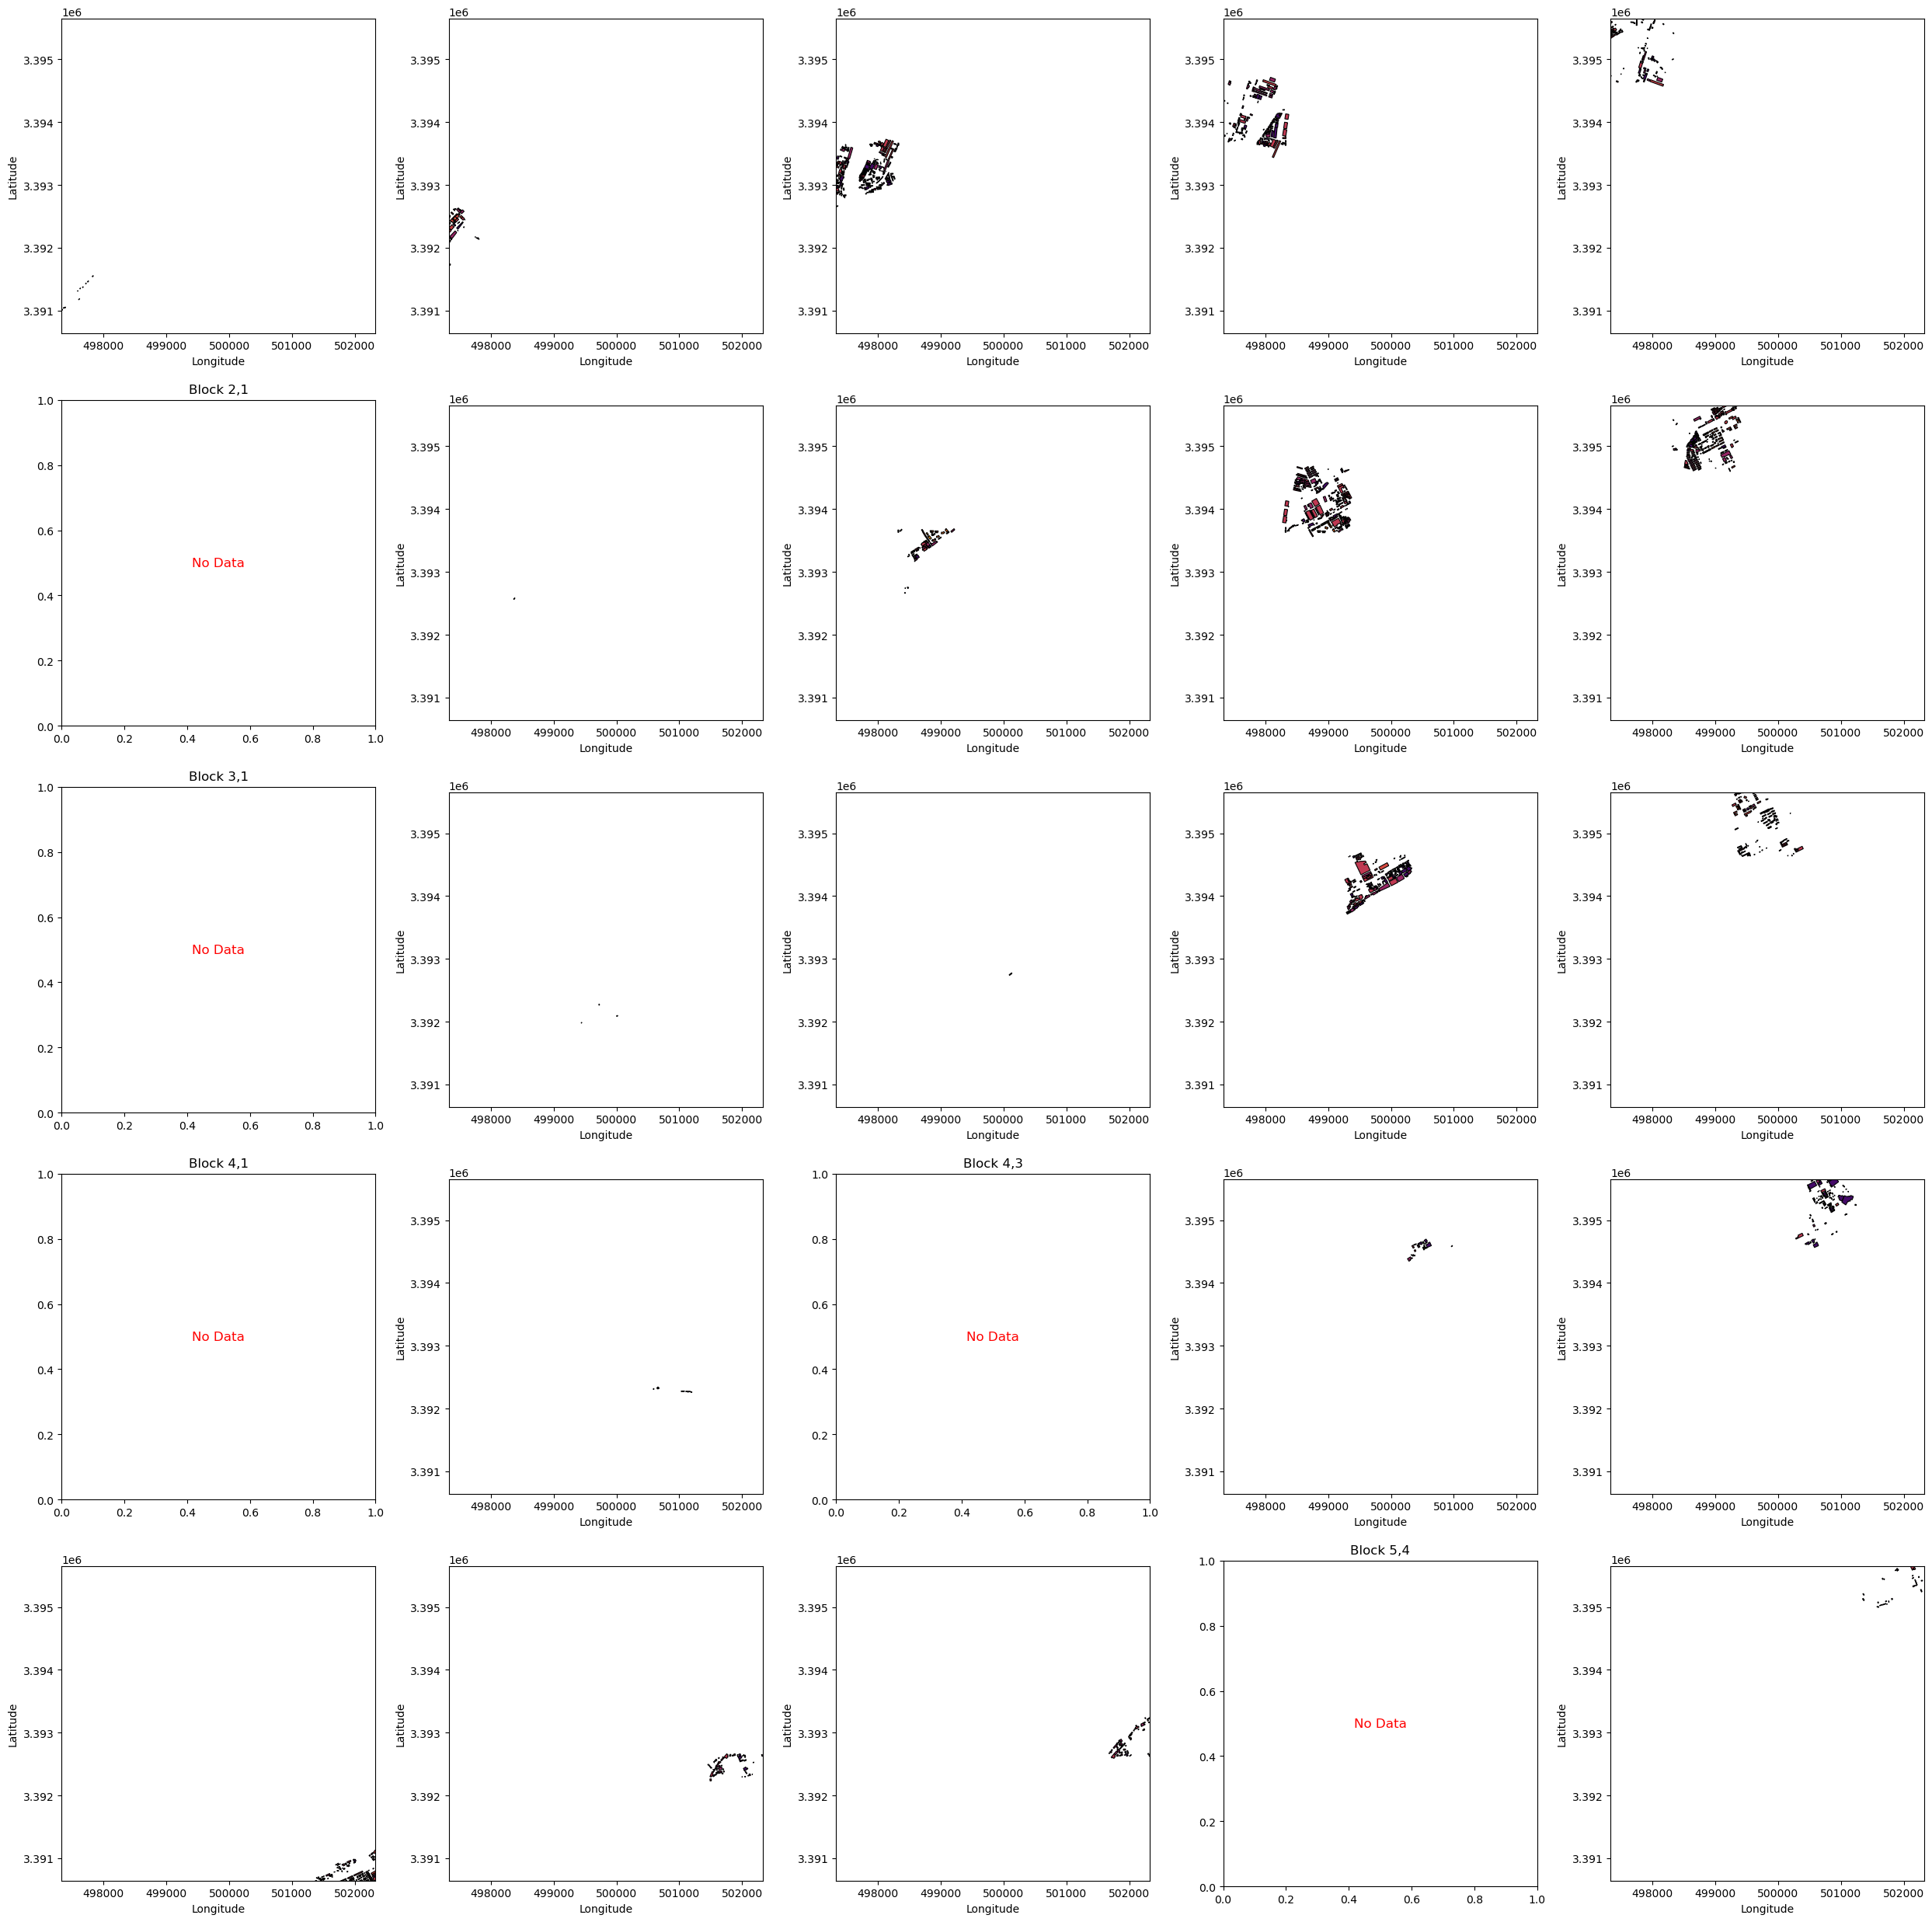

In [72]:
# 改进

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

# 计算中心点
x_center = (xmin + xmax) / 2
y_center = (ymin + ymax) / 2

# 定义居中的5km×5km区域
half_size = 2500  # 一半的距离，5km/2 = 2500m
x_min_center = x_center - half_size
x_max_center = x_center + half_size
y_min_center = y_center - half_size
y_max_center = y_center + half_size

# 筛选出居中5km×5km区域的建筑足迹
center_area = building_footprints.cx[x_min_center:x_max_center, y_min_center:y_max_center]

# 将中心区域划分成1km×1km的小块
block_size = 1000  # 每块的大小为1km

# 定义25个小块的边界
regions = []
for i in range(5):
    for j in range(5):
        x_min_r = x_min_center + i * block_size
        x_max_r = x_min_center + (i + 1) * block_size
        y_min_r = y_min_center + j * block_size
        y_max_r = y_min_center + (j + 1) * block_size
        regions.append((f"Block {i+1},{j+1}", (x_min_r, x_max_r, y_min_r, y_max_r)))

# 创建子图
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.flatten()  # 将二维数组展平，方便迭代

# 计算整个区域的 Elevation 范围用于标准化
elevation_values = center_area['Elevation'].dropna()
vmin = elevation_values.min()
vmax = elevation_values.max()
vcenter = elevation_values.mean()

# 设置统一的x和y轴范围
x_limits = (x_min_center, x_max_center)
y_limits = (y_min_center, y_max_center)

for i, (region_name, (x_min_r, x_max_r, y_min_r, y_max_r)) in enumerate(regions):
    # 筛选出当前区域的建筑足迹
    region_area = center_area.cx[x_min_r:x_max_r, y_min_r:y_max_r]

    if not region_area.empty:
        # 设定颜色映射的范围
        norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

        # 使用更高对比度的颜色映射（如 'plasma', 'inferno'）
        region_ax = axs[i]
        region_area.plot(column='Elevation', ax=region_ax, cmap='inferno', legend=False, linewidth=0.8, edgecolor='black', norm=norm)
    else:
        axs[i].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12, color='red')
        axs[i].set_title(f"{region_name}")

    # 设置每个子图的x和y轴范围，保证比例一致
    region_ax.set_xlim(x_limits)
    region_ax.set_ylim(y_limits)
    region_ax.set_xlabel("Longitude")
    region_ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()




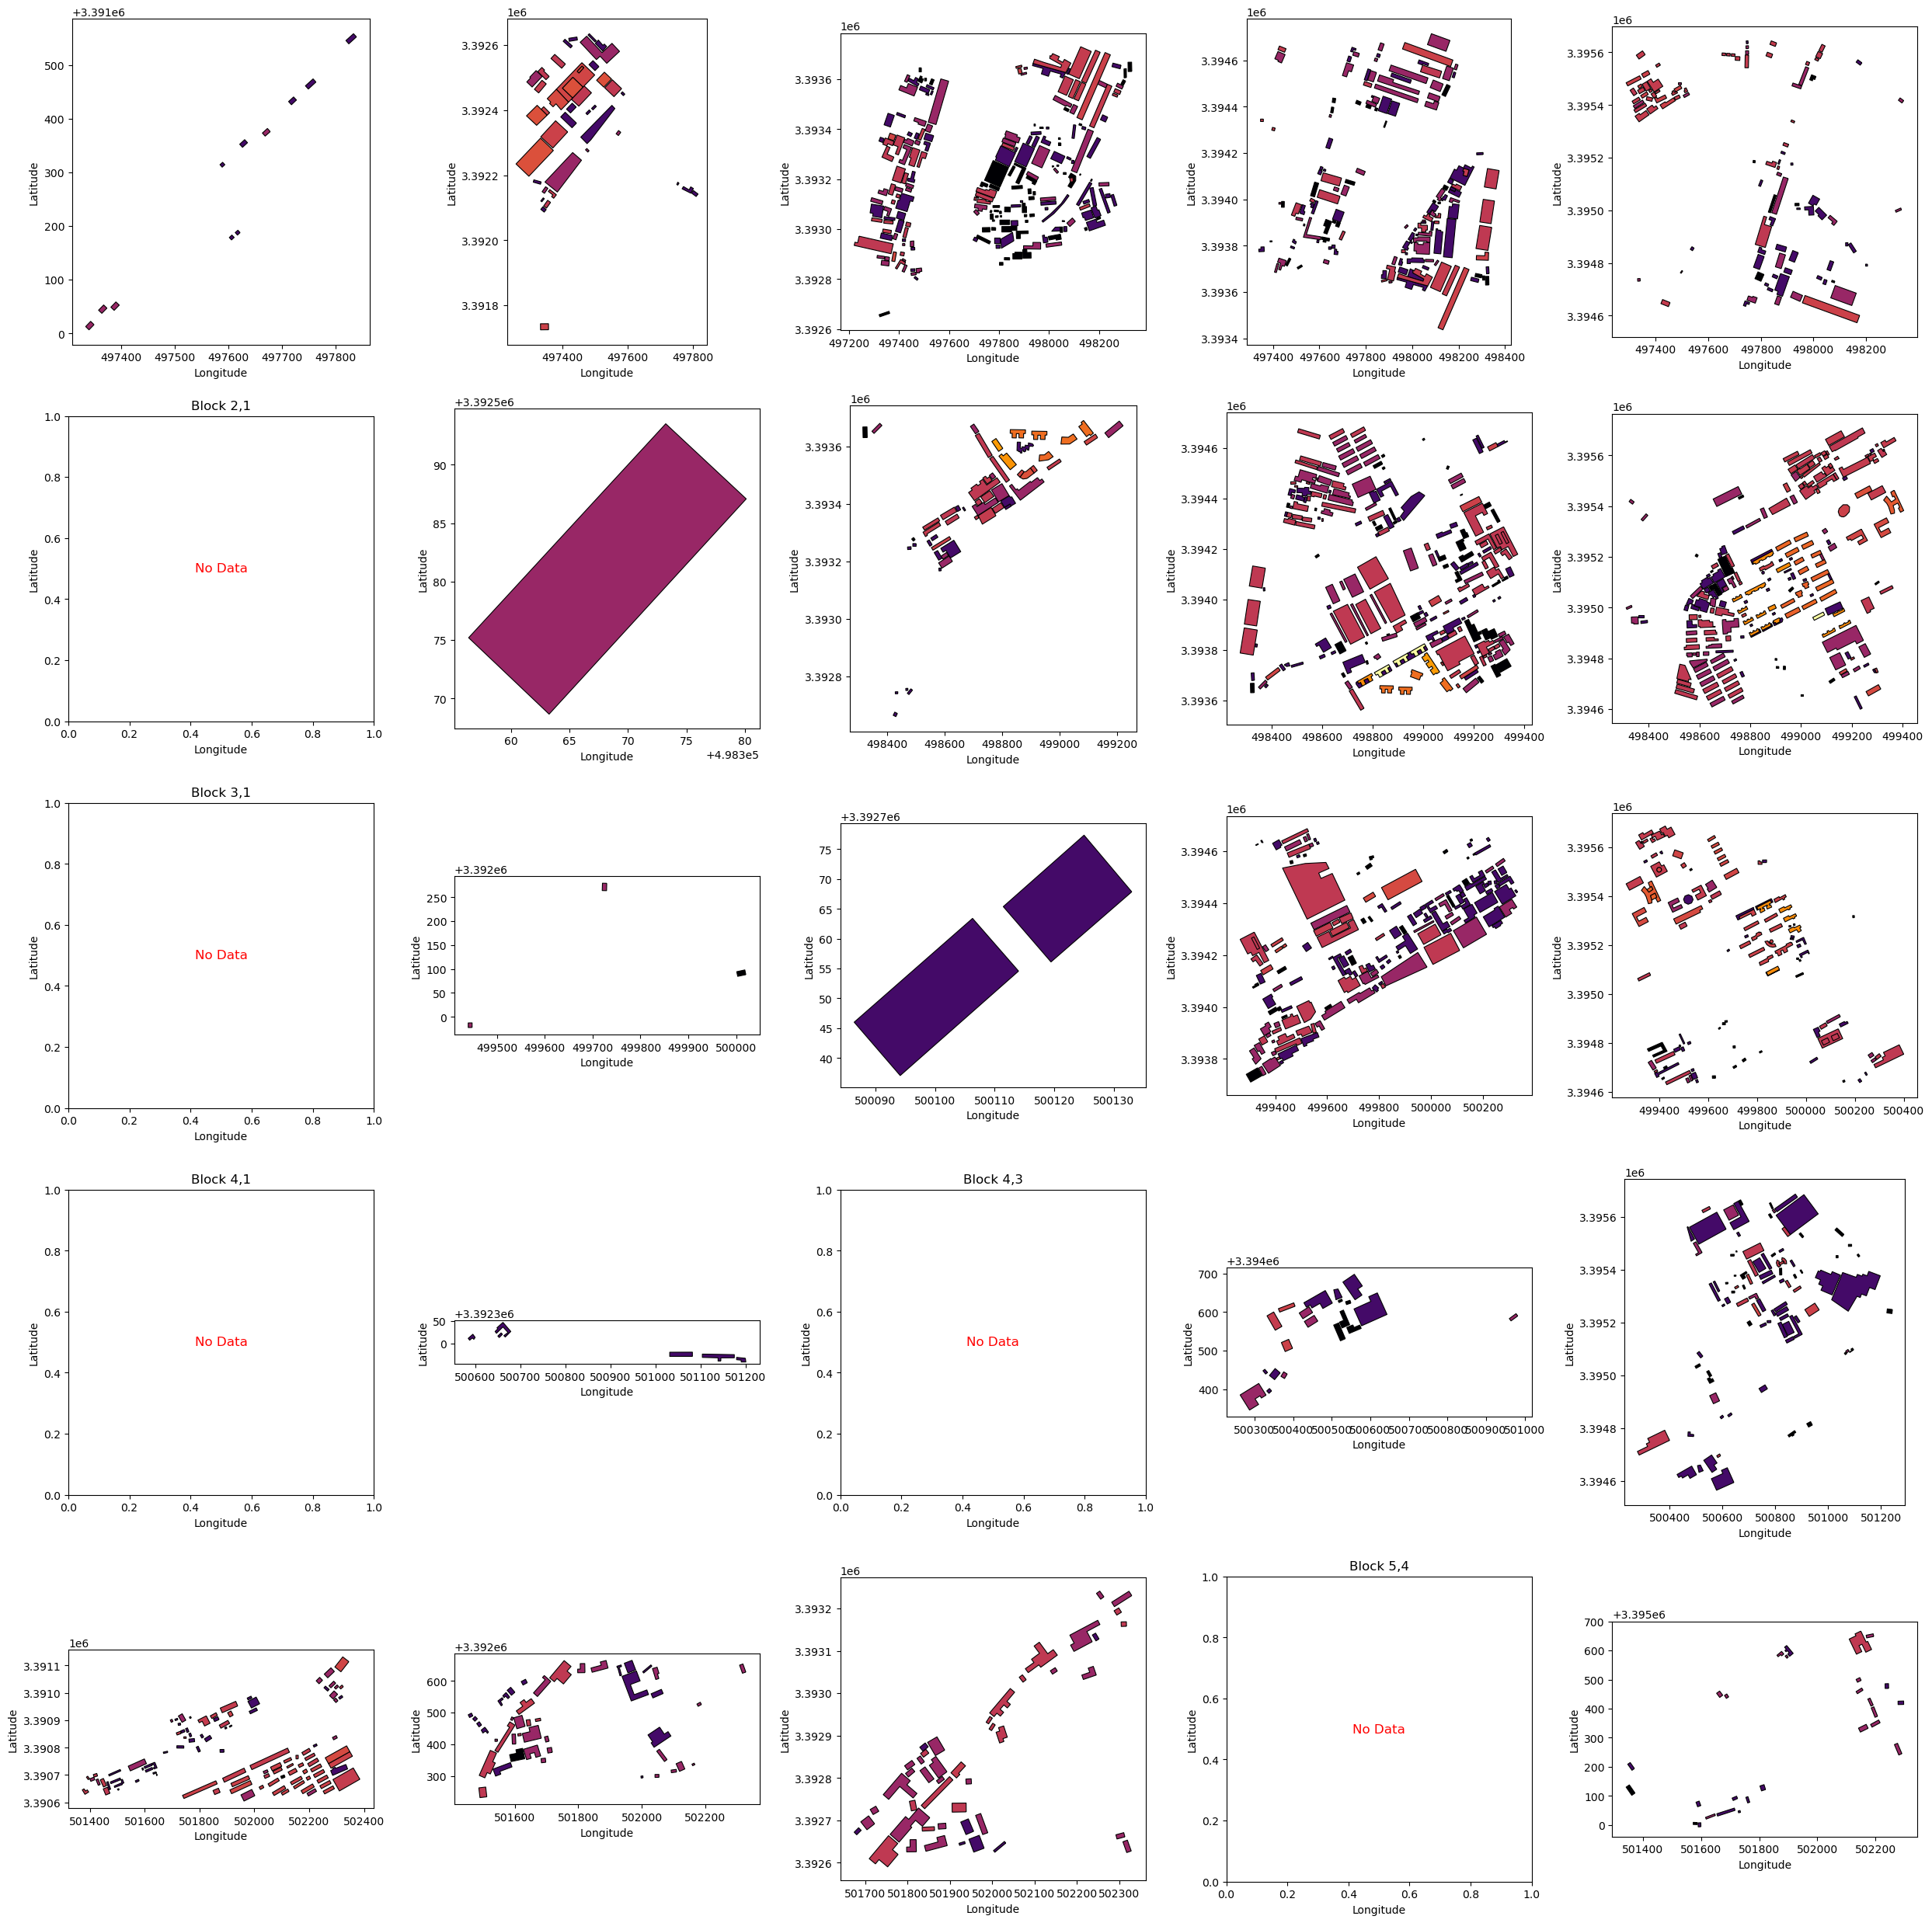

In [75]:
# 为了让每个格子能够自适应地显示包含的数据，可以去除固定的 xlim 和 ylim 设置，而是让 matplotlib 自动根据数据范围调整每个子图的显示。这将确保每个格子能够最大化地展示其中的建筑数据。

# 要在不进行建筑轮廓拉伸或压缩的情况下保证长宽比一致，同时自适应地显示数据，你可以使用 set_aspect('equal') 来确保每个子图的比例尺保持一致。这样可以在每个子图中正确显示建筑轮廓，而不会因长宽比的改变而变形。

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np

# 读取建筑足迹数据
shapefile_path = 'F:/ScientificDatabase/2019年我国建筑轮廓含高度/武汉/武汉/Wuhan_Buildings_DWG-Polygon.shp'
building_footprints = gpd.read_file(shapefile_path)

# 获取建筑足迹数据的边界
xmin, ymin, xmax, ymax = building_footprints.total_bounds

# 计算中心点
x_center = (xmin + xmax) / 2
y_center = (ymin + ymax) / 2

# 定义居中的5km×5km区域
half_size = 2500  # 一半的距离，5km/2 = 2500m
x_min_center = x_center - half_size
x_max_center = x_center + half_size
y_min_center = y_center - half_size
y_max_center = y_center + half_size

# 筛选出居中5km×5km区域的建筑足迹
center_area = building_footprints.cx[x_min_center:x_max_center, y_min_center:y_max_center]

# 将中心区域划分成1km×1km的小块
block_size = 1000  # 每块的大小为1km

# 定义25个小块的边界
regions = []
for i in range(5):
    for j in range(5):
        x_min_r = x_min_center + i * block_size
        x_max_r = x_min_center + (i + 1) * block_size
        y_min_r = y_min_center + j * block_size
        y_max_r = y_min_center + (j + 1) * block_size
        regions.append((f"Block {i+1},{j+1}", (x_min_r, x_max_r, y_min_r, y_max_r)))

# 创建子图
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.flatten()  # 将二维数组展平，方便迭代

# 计算整个区域的 Elevation 范围用于标准化
elevation_values = center_area['Elevation'].dropna()
vmin = elevation_values.min()
vmax = elevation_values.max()
vcenter = elevation_values.mean()

for i, (region_name, (x_min_r, x_max_r, y_min_r, y_max_r)) in enumerate(regions):
    # 筛选出当前区域的建筑足迹
    region_area = center_area.cx[x_min_r:x_max_r, y_min_r:y_max_r]

    region_ax = axs[i]
    
    if not region_area.empty:
        # 设定颜色映射的范围
        norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

        # 使用更高对比度的颜色映射（如 'plasma', 'inferno'）
        region_area.plot(column='Elevation', ax=region_ax, cmap='inferno', legend=False, linewidth=0.8, edgecolor='black', norm=norm)
    else:
        region_ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12, color='red')
        region_ax.set_title(f"{region_name}")

    # 保持每个子图的长宽比一致
    region_ax.set_aspect('equal')
    region_ax.set_xlabel("Longitude")
    region_ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


# 总结